<a href="https://colab.research.google.com/github/xyaoaf/UrbanTreeStudywithLidar/blob/main/230304TreePopulationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
# load your CSV file into a pandas DataFrame
dfEast = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East009701_TreeMetrics.csv')
dfEastArc = pd.read_csv('//content/drive/MyDrive/XihanYAO_GISDataShare/East009701_TreeMetrics_230305ArcPara.csv')
dfWest = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West002401_TreeMetrics.csv')
dfWestArc = pd.read_csv('//content/drive/MyDrive/XihanYAO_GISDataShare/West002401_TreeMetrics_230305ArcPara.csv')

# specify the column(s) that define a unique feature
feature_cols = ['name']

# drop duplicates based on the feature columns and keep the first occurrence
dfEast.drop_duplicates(subset=feature_cols, keep='first', inplace=True)
dfWest.drop_duplicates(subset=feature_cols, keep='first', inplace=True)

In [3]:
dfEast.tail(5)

index  name     min_x      min_y     max_x      max_y  abv   all  min  \
8656   8656  7623 538339.96 5039094.69 538346.36 5039100.17  308   862 1.48   
8657   8657  7625 538308.26 5039093.77 538311.61 5039097.12  137   389 2.09   
8658   8658  7627 538247.30 5039092.86 538252.48 5039096.21  322   654 1.47   
8659   8659  7628 538277.47 5039093.16 538284.79 5039097.12  538  1068 1.37   
8660   8660  7638 538212.55 5039090.72 538218.34 5039095.91    0     0  NaN   

       max   avg    qav  std  ske  kur  hom  p10  p25   p50   p75   p90   p95  \
8656 21.27  9.28 109.77 4.88 0.58 3.01 1.48 3.33 5.56  9.14 11.84 17.50 18.88   
8657 20.93  9.58 112.64 4.59 0.14 3.27 2.09 2.54 6.77 11.29 11.49 11.60 18.72   
8658 19.59  7.68  86.12 5.21 0.34 2.18 1.47 1.81 2.02  9.07 11.32 11.53 17.62   
8659 22.48 10.42 151.90 6.58 0.06 1.87 1.37 1.84 1.93 11.83 14.22 20.07 20.33   
8660   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   

      b10  b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  \
8656 0.10 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57   
8657 0.20 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61   
8658 0.38 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41   
8659 0.28 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47   
8660  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN   

      dns_gap  
8656     0.64  
8657     0.65  
8658     0.51  
8659     0.50  
8660      NaN

In [4]:
dfEastArc.tail(5)

OID_  height  winRadius  treeID  crownArea  Ground  SArea  Min_Slope  \
7598  7598   19.46       2.47    7623      16.17       0 277.07       0.12   
7599  7599   13.55       2.18    7625       6.22       0  91.12       0.20   
7600  7600   19.98       2.50    7627       9.94       0 190.38       0.00   
7601  7601   25.48       2.77    7628      15.14       0 334.22       0.00   
7602  7602   15.71       2.29    7638      13.19       0   0.00       0.00   

      Max_Slope  Avg_Slope  Z_Mean_FirstReturn  
7598   10000.00    3781.20                5.10  
7599    8227.38    2632.09                4.00  
7600    6532.73    3023.02                4.67  
7601   10000.00    3937.76                6.06  
7602       0.00       0.00                0.00

In [5]:
ids1 = set(dfEast['name'])
ids2 = set(dfEastArc['treeID'])

# Check if the sets are equal
if ids1 == ids2:
    print('The IDs match perfectly')
else:
    # Find the IDs that are in one set but not the other
    missing_ids = ids1.symmetric_difference(ids2)
    print(f'The following IDs are not present in both dataframes: {missing_ids}')

The following IDs are not present in both dataframes: {2828, 4760, 5752}


In [6]:
# Drop rows I
dfEastArc = dfEastArc.drop(dfEastArc[dfEastArc['treeID'] == 2828].index)
dfEastArc = dfEastArc.drop(dfEastArc[dfEastArc['treeID'] == 4760].index)
dfEastArc = dfEastArc.drop(dfEastArc[dfEastArc['treeID'] == 5752].index)

# Print the updated DataFrame
# print(dfEastArc)

In [7]:
ids1 = set(dfEast['name'])
ids2 = set(dfEastArc['treeID'])

# Check if the sets are equal
if ids1 == ids2:
    print('The IDs match perfectly')
else:
    # Find the IDs that are in one set but not the other
    missing_ids = ids1.symmetric_difference(ids2)
    print(f'The following IDs are not present in both dataframes: {missing_ids}')

The IDs match perfectly


In [8]:
dfWest.tail(5)

index  name     min_x      min_y     max_x      max_y   abv    all  min  \
6648   6648  5550 526879.57 5042886.29 526885.97 5042887.82     0      0  NaN   
6650   6650  5551 527213.63 5042886.29 527227.65 5042898.79  7853  12035 1.37   
6658   6658  5552 527214.55 5042886.90 527215.46 5042887.82     0      0  NaN   
6659   6659  5553 527291.97 5042886.90 527295.93 5042887.82     0      0  NaN   
6661   6661  5554 527323.67 5042886.90 527327.93 5042887.82    11     12 6.26   

       max  avg   qav  std   ske  kur  hom  p10  p25  p50  p75  p90  b10  b20  \
6648   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6650 14.88 5.75 38.19 2.25  1.09 4.50 1.37 3.09 4.44 5.56 6.55 9.27 0.05 0.21   
6658   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6659   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6661  8.88 7.85 62.52 1.00 -0.67 1.72 6.26 6.43 7.18 8.09 8.60 8.78 0.00 0.00   

      b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  
6648  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  
6650 0.46 0.80 0.88 0.91 0.96 0.99 1.00 0.23 0.34 0.08     0.20     0.35  
6658  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  
6659  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  
6661 0.00 0.00 0.00 0.00 0.20 0.20 0.50 0.00 0.42 0.50     0.00     0.08

In [9]:
dfWestArc.tail(5)

OID_  height  winRadius  treeID  crownArea  Ground  SArea  Min_Slope  \
5549  5549   19.07       2.45    5550       5.30       0   0.00       0.00   
5550  5550   32.91       3.15    5551     110.55       0 653.35       0.00   
5551  5551   20.89       2.54    5552       0.46       0   0.67     487.13   
5552  5552   37.57       3.38    5553       2.69       0  25.70     427.39   
5553  5553   32.30       3.12    5554       2.51       0  20.27     282.66   

      Max_Slope  Avg_Slope  Z_Mean_FirstReturn  
5549       0.00       0.00                0.00  
5550    6611.96    1173.94                4.91  
5551     740.00     674.45                6.56  
5552    3290.28    2227.96                4.54  
5553   10000.00    2105.27                4.28

In [10]:
ids1 = set(dfWest['name'])
ids2 = set(dfWestArc['treeID'])

# Check if the sets are equal
if ids1 == ids2:
    print('The IDs match perfectly')
else:
    # Find the IDs that are in one set but not the other
    missing_ids = ids1.symmetric_difference(ids2)
    print(f'The following IDs are not present in both dataframes: {missing_ids}')

The IDs match perfectly


In [11]:
dfEastMerge = pd.merge(dfEast, dfEastArc, left_on='name', right_on='treeID')
dfEastMerge = dfEastMerge.drop(dfEastMerge[dfEastMerge['treeID'] == 7638].index)
dfWestMerge = pd.merge(dfWest, dfWestArc, left_on='name', right_on='treeID')
dfEastMerge

index  name     min_x      min_y     max_x      max_y   abv   all  min  \
0         0     6 538937.97 5040732.68 538951.08 5040739.39  2501  3462 1.54   
1         2     7 539140.97 5040732.38 539143.10 5040735.73    91   213 1.83   
2         3     8 538708.76 5040732.68 538713.94 5040735.73   131   370 1.49   
3         4     9 538871.53 5040732.68 538876.40 5040736.34   316   599 1.47   
4         5    10 538892.25 5040732.68 538897.13 5040736.03   300   600 2.10   
...     ...   ...       ...        ...       ...        ...   ...   ...  ...   
7594   8654  7621 538367.08 5039095.60 538371.66 5039103.22   513   917 1.42   
7595   8656  7623 538339.96 5039094.69 538346.36 5039100.17   308   862 1.48   
7596   8657  7625 538308.26 5039093.77 538311.61 5039097.12   137   389 2.09   
7597   8658  7627 538247.30 5039092.86 538252.48 5039096.21   322   654 1.47   
7598   8659  7628 538277.47 5039093.16 538284.79 5039097.12   538  1068 1.37   

       max   avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  \
0    11.73  6.29  41.82 1.49  0.46  6.90 1.54 4.63  5.53  6.50  6.95  7.41   
1    11.48  3.57  17.04 2.08  2.88 11.25 1.83 2.33  2.47  2.65  3.99  4.54   
2    11.77 10.27 109.21 1.93 -2.52  9.09 1.49 7.07 10.49 10.66 11.39 11.54   
3    11.61  4.05  21.08 2.17  2.72  9.37 1.47 2.66  3.10  3.55  3.91  5.01   
4    12.12  3.73  19.94 2.47  2.83  9.34 2.10 2.46  2.72  3.07  3.34  3.75   
...    ...   ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...   
7594 22.70  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50   
7595 21.27  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50   
7596 20.93  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60   
7597 19.59  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53   
7598 22.48 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07   

       p95  b10  b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  \
0     7.61 0.02 0.03 0.09 0.25 0.52 0.95 0.97 0.97 0.97 0.12 0.57 0.03   
1     8.02 0.13 0.59 0.79 0.94 0.94 0.94 0.94 0.94 0.94 0.39 0.00 0.02   
2    11.64 0.00 0.01 0.02 0.02 0.07 0.11 0.11 0.13 0.59 0.01 0.03 0.31   
3    11.19 0.03 0.42 0.90 0.90 0.92 0.92 0.93 0.93 0.93 0.47 0.01 0.04   
4    11.58 0.09 0.85 0.91 0.91 0.91 0.91 0.91 0.92 0.92 0.46 0.00 0.04   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7594 21.45 0.31 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15   
7595 18.88 0.10 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17   
7596 18.72 0.20 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23   
7597 17.62 0.38 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22   
7598 20.33 0.28 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22   

      cov_gap  dns_gap  OID_  height  winRadius  treeID  crownArea  Ground  \
0        0.16     0.28     0   22.07       2.60       6      50.73       0   
1        0.52     0.57     1   11.85       2.09       7       3.25       0   
2        0.61     0.65     2   15.50       2.27       8       7.71       0   
3        0.40     0.47     3   11.67       2.08       9       9.85       0   
4        0.42     0.50     4   11.07       2.05      10      10.68       0   
...       ...      ...   ...     ...        ...     ...        ...     ...   
7594     0.40     0.44  7597   25.14       2.76    7621      13.56       0   
7595     0.57     0.64  7598   19.46       2.47    7623      16.17       0   
7596     0.61     0.65  7599   13.55       2.18    7625       6.22       0   
7597     0.41     0.51  7600   19.98       2.50    7627       9.94       0   
7598     0.47     0.50  7601   25.48       2.77    7628      15.14       0   

      SArea  Min_Slope  Max_Slope  Avg_Slope  Z_Mean_FirstReturn  
0      9.88       0.23   10000.00    1604.23                5.08  
1      0.89       0.07   10000.00    1297.02                1.94  
2      2.84       0.03   10000.00    2419.12                3.94  
3      4.70   

In [12]:
dfWestMerge

index  name     min_x      min_y     max_x      max_y   abv    all  min  \
0         0     1 527376.70 5043916.21 527377.01 5043916.52     0      1 0.00   
1         1     2 527373.04 5043914.99 527373.35 5043915.30     1      4 1.52   
2         2     3 527030.45 5043911.64 527034.10 5043912.86    46    100 2.68   
3         3     4 527245.03 5043901.88 527259.66 5043916.21  8679  11003 1.37   
4         5     5 527344.70 5043902.50 527362.07 5043917.74  8936  10874 1.44   
...     ...   ...       ...        ...       ...        ...   ...    ...  ...   
5549   6648  5550 526879.57 5042886.29 526885.97 5042887.82     0      0  NaN   
5550   6650  5551 527213.63 5042886.29 527227.65 5042898.79  7853  12035 1.37   
5551   6658  5552 527214.55 5042886.90 527215.46 5042887.82     0      0  NaN   
5552   6659  5553 527291.97 5042886.90 527295.93 5042887.82     0      0  NaN   
5553   6661  5554 527323.67 5042886.90 527327.93 5042887.82    11     12 6.26   

       max  avg   qav  std   ske   kur  hom  p10  p25  p50   p75   p90  b10  \
0     0.00 0.00  0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00   
1     1.52 1.52  2.30 0.00  0.00  0.00 1.52 1.52 1.52 1.52  1.52  1.52 0.00   
2     2.91 2.87  8.23 0.04 -2.96 12.22 2.68 2.85 2.86 2.88  2.89  2.90 0.00   
3    14.93 7.99 72.76 2.98 -0.23  2.19 1.37 3.69 5.82 8.25 10.30 11.78 0.04   
4    16.93 8.16 78.78 3.48  0.25  2.26 1.44 3.47 5.50 8.00 10.26 13.43 0.05   
...    ...  ...   ...  ...   ...   ...  ...  ...  ...  ...   ...   ...  ...   
5549   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5550 14.88 5.75 38.19 2.25  1.09  4.50 1.37 3.09 4.44 5.56  6.55  9.27 0.05   
5551   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5552   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5553  8.88 7.85 62.52 1.00 -0.67  1.72 6.26 6.43 7.18 8.09  8.60  8.78 0.00   

      b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  \
0    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00   
1    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     0.75     0.75   
2    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52     0.54   
3    0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17     0.21   
4    0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15     0.18   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
5549  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5550 0.21 0.46 0.80 0.88 0.91 0.96 0.99 1.00 0.23 0.34 0.08     0.20     0.35   
5551  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5552  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5553 0.00 0.00 0.00 0.00 0.00 0.20 0.20 0.50 0.00 0.42 0.50     0.00     0.08   

      OID_  height  winRadius  treeID  crownArea  Ground   SArea  Min_Slope  \
0        0    9.67       1.98       1       0.09       0    1.09    1869.04   
1        1    6.91       1.85       2       0.09       0    0.20     113.46   
2        2    7.91       1.90       3       2.60       0   15.54       0.45   
3        3   37.24       3.36       4     139.17       0 1273.63       0.00   
4        4   47.28       3.86       5     168.25       0 1121.49       0.00   
...    ...     ...        ...     ...        ...     ...     ...        ...   
5549  5549   19.07       2.45    5550       5.30       0    0.00       0.00   
5550  5550   32.91       3.15    5551     110.55       0  653.35       0.00   
5551  5551   20.89       2.54    5552       0.46       0    0.67     487.13   
5552  5552   37.57       3.38    5553       2.69       0   25.70     427.39   
5553  5553   32.30       3.12    5554       2.51       0   20.27     282.66   

      Max_Slope  Avg_Slope  Z_Mean_FirstReturn  
0       1871.38    1870.21                2.89  
1        540.56     225.68                0.17  
2       5698.07

In [13]:
print(len(dfEast))
print(len(dfEastArc))
print(len(dfEastMerge))
print(len(dfWest))
print(len(dfWestArc))
print(len(dfWestMerge))

7600
7600
7599
5554
5554
5554


In [14]:
# check which tree names are missing
# create a range of expected index values
expected_idx = pd.RangeIndex(start=1, stop=7629)
# check which index values are missing
missing_idx = expected_idx.difference(dfEastMerge.name)
# display the missing index values
print('Missing index values:', missing_idx)

# create a range of expected index values
expected_idx = pd.RangeIndex(start=1, stop=5555)
# check which index values are missing
missing_idx = expected_idx.difference(dfWestMerge.name)
# display the missing index values
print('Missing index values:', missing_idx)

Missing index values: Int64Index([   1,    2,    3,    4,    5, 2828, 4760, 5752, 7553, 7558, 7561,
            7567, 7568, 7569, 7572, 7580, 7584, 7585, 7597, 7599, 7601, 7608,
            7612, 7617, 7619, 7620, 7622, 7624, 7626],
           dtype='int64')
Missing index values: RangeIndex(start=1, stop=1, step=1)


In [15]:
dfWestMerge = dfWestMerge.drop(columns='Ground')
dfWestMerge = dfWestMerge.drop(columns='treeID')
dfWestMerge = dfWestMerge.drop(columns='OID_')
dfWestMerge = dfWestMerge.drop(columns='index')
dfWestMerge = dfWestMerge.drop(columns='winRadius')
dfEastMerge = dfEastMerge.drop(columns='treeID')
dfEastMerge = dfEastMerge.drop(columns='p95')
dfEastMerge = dfEastMerge.drop(columns='Ground')
dfEastMerge = dfEastMerge.drop(columns='OID_')
dfEastMerge = dfEastMerge.drop(columns='index')
dfEastMerge = dfEastMerge.drop(columns='winRadius')
dfEastMerge = dfEastMerge.rename(columns={'name': 'treeID'})
dfWestMerge = dfWestMerge.rename(columns={'name': 'treeID'})
dfWestMerge['height'] = dfWestMerge['height']*0.3048
dfEastMerge['height'] = dfEastMerge['height']*0.3048

In [16]:
# merge two datasets together
dfWestMerge['treeID'] = dfWestMerge['treeID'] + 10000
dfEastMerge['treeID'] = dfEastMerge['treeID'] + 20000

In [17]:
# check column names
print(dfEastMerge.columns)
print(dfWestMerge.columns)

Index(['treeID', 'min_x', 'min_y', 'max_x', 'max_y', 'abv', 'all', 'min',
       'max', 'avg', 'qav', 'std', 'ske', 'kur', 'hom', 'p10', 'p25', 'p50',
       'p75', 'p90', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80',
       'b90', 'd00', 'd01', 'd02', 'cov_gap', 'dns_gap', 'height', 'crownArea',
       'SArea', 'Min_Slope', 'Max_Slope', 'Avg_Slope', 'Z_Mean_FirstReturn'],
      dtype='object')
Index(['treeID', 'min_x', 'min_y', 'max_x', 'max_y', 'abv', 'all', 'min',
       'max', 'avg', 'qav', 'std', 'ske', 'kur', 'hom', 'p10', 'p25', 'p50',
       'p75', 'p90', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80',
       'b90', 'd00', 'd01', 'd02', 'cov_gap', 'dns_gap', 'height', 'crownArea',
       'SArea', 'Min_Slope', 'Max_Slope', 'Avg_Slope', 'Z_Mean_FirstReturn'],
      dtype='object')


## Add spectural bands

In [18]:
import os

# define the folder path containing the CSV files
folder_path = "/content/drive/MyDrive/XihanYAO_GISDataShare/230308ZonalSpectrual"

# create an empty dictionary to store the DataFrames
dfs = {}
df_names=[]

# loop over each file in the folder
for file_name in os.listdir(folder_path):
    # check if the file is a CSV file
    if file_name.endswith(".csv"):
        # read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(folder_path, file_name))
        # name the DataFrame after the file name
        df_name = file_name.split(".")[0]
        df.name = df_name
        df_names.append(df.name)
        # add the DataFrame to the dictionary
        dfs[df_name] = df

# example: print the first few rows of the DataFrame with file name "example.csv"
print(dfs["e_2018_1_zonal"].head())

   OID_  TREEID  COUNT   AREA  MIN  MAX  RANGE   MEAN   STD      SUM  VARIETY  \
0     1       6 546.00 546.00   25   95     70  51.63 14.94 28192.00       68   
1     2       7  35.00  35.00   32  206    174 154.06 52.35  5392.00       28   
2     3       8  83.00  83.00  136  213     77 186.57 19.50 15485.00       47   
3     4       9 107.00 107.00   22  215    193 116.60 61.33 12476.00       86   
4     5      10 115.00 115.00   31  216    185 140.86 63.07 16199.00       78   

   MAJORITY  MINORITY  MEDIAN  PCT25  PCT75  
0        55        25      52     40     61  
1       206        32     175    105    188  
2       209       136     184    173    206  
3        88        22     100     61    182  
4       215        31     165     78    200  


In [19]:
dfs["e_2018_1_zonal"]
# sort the dictionary by key and create a new dictionary
dfs = dict(sorted(dfs.items()))
dfs.keys()

dict_keys(['e_2018_1_zonal', 'e_2018_2_zonal', 'e_2018_3_zonal', 'e_2018_4_zonal', 'e_2020_1_zonal', 'e_2020_2_zonal', 'e_2020_3_zonal', 'e_2020_4_zonal', 'w_2018_1_zonal', 'w_2018_2_zonal', 'w_2018_3_zonal', 'w_2018_4_zonal', 'w_2020_1_zonal', 'w_2020_2_zonal', 'w_2020_3_zonal', 'w_2020_4_zonal'])

In [20]:
df_names.sort()
df_names

['e_2018_1_zonal',
 'e_2018_2_zonal',
 'e_2018_3_zonal',
 'e_2018_4_zonal',
 'e_2020_1_zonal',
 'e_2020_2_zonal',
 'e_2020_3_zonal',
 'e_2020_4_zonal',
 'w_2018_1_zonal',
 'w_2018_2_zonal',
 'w_2018_3_zonal',
 'w_2018_4_zonal',
 'w_2020_1_zonal',
 'w_2020_2_zonal',
 'w_2020_3_zonal',
 'w_2020_4_zonal']

In [21]:
for key, df in list(dfs.items())[:16]:
  df['TREEID'] = df['TREEID'] + 10000
for key, df in list(dfs.items())[:8]:
  df['TREEID'] = df['TREEID'] + 10000

In [22]:
dfs["e_2018_3_zonal"]

OID_  TREEID  COUNT   AREA  MIN  MAX  RANGE   MEAN   STD      SUM  \
0        1   20006 546.00 546.00   53  100     47  72.27  7.70 39457.00   
1        2   20007  35.00  35.00   65  191    126 147.06 38.33  5147.00   
2        3   20008  83.00  83.00  143  205     62 181.77 15.79 15087.00   
3        4   20009 107.00 107.00   64  204    140 123.21 46.18 13183.00   
4        5   20010 115.00 115.00   67  205    138 143.41 48.33 16492.00   
...    ...     ...    ...    ...  ...  ...    ...    ...   ...      ...   
7594  7595   27621 146.00 146.00   58  213    155 135.88 54.03 19839.00   
7595  7596   27623 175.00 175.00   65  206    141 158.66 35.68 27766.00   
7596  7597   27625  67.00  67.00  107  186     79 168.01 13.64 11257.00   
7597  7598   27627 107.00 107.00   74  185    111 140.15 35.97 14996.00   
7598  7599   27628 164.00 164.00   80  199    119 148.72 33.26 24390.00   

      VARIETY  MAJORITY  MINORITY  MEDIAN  PCT25  PCT75  
0          43        73        53      72     66     77  
1          28        90        65     156    126    180  
2          39       171       143     180    170    197  
3          69        95        64     106     84    174  
4          72        73        67     163     93    188  
...       ...       ...       ...     ...    ...    ...  
7594       78        78        58     157     78    184  
7595       82       166        65     169    140    179  
7596       31       176       107     172    162    176  
7597       63       178        74     149    105    175  
7598       73       177        80     163    121    177  

[7599 rows x 16 columns]

In [23]:

df_2018_1_zonal = pd.concat([dfs["e_2018_1_zonal"], dfs["w_2018_1_zonal"]]).rename(columns={'MEAN': '2018_R'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2018_2_zonal = pd.concat([dfs["e_2018_2_zonal"], dfs["w_2018_2_zonal"]]).rename(columns={'MEAN': '2018_G'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2018_3_zonal = pd.concat([dfs["e_2018_3_zonal"], dfs["w_2018_3_zonal"]]).rename(columns={'MEAN': '2018_B'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2018_4_zonal = pd.concat([dfs["e_2018_4_zonal"], dfs["w_2018_4_zonal"]]).rename(columns={'MEAN': '2018_N'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2020_1_zonal = pd.concat([dfs["e_2020_1_zonal"], dfs["w_2020_1_zonal"]]).rename(columns={'MEAN': '2020_R'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2020_2_zonal = pd.concat([dfs["e_2020_2_zonal"], dfs["w_2020_2_zonal"]]).rename(columns={'MEAN': '2020_G'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2020_3_zonal = pd.concat([dfs["e_2020_3_zonal"], dfs["w_2020_3_zonal"]]).rename(columns={'MEAN': '2020_B'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})
df_2020_4_zonal = pd.concat([dfs["e_2020_4_zonal"], dfs["w_2020_4_zonal"]]).rename(columns={'MEAN': '2020_N'}).reset_index(drop=True).rename(columns={'TREEID': 'treeID'})

In [24]:
df_2020_2_zonal

OID_  treeID  COUNT    AREA  MIN  MAX  RANGE  2020_G   STD      SUM  \
0         1   20006 145.00  561.28   57  121     64   83.68 14.38 12134.00   
1         2   20007  10.00   38.71   68  116     48   84.50 13.76   845.00   
2         3   20008  22.00   85.16  164  208     44  195.77 12.29  4307.00   
3         4   20009  29.00  112.26   66  189    123  128.31 31.22  3721.00   
4         5   20010  26.00  100.64   77  186    109  129.15 31.64  3358.00   
...     ...     ...    ...     ...  ...  ...    ...     ...   ...      ...   
13126  5537   15550   9.00   34.84   47   61     14   53.78  5.24   484.00   
13127  5538   15551 291.00 1126.44   43  123     80   74.62 16.08 21713.00   
13128  5539   15552   1.00    3.87   65   65      0   65.00  0.00    65.00   
13129  5540   15553   6.00   23.23   71   84     13   75.83  4.14   455.00   
13130  5541   15554   3.00   11.61   83   99     16   90.33  6.60   271.00   

       VARIETY  MAJORITY  MINORITY  MEDIAN  PCT25  PCT75  
0           53        92        57      85     72     95  
1            8        76        68      78     76     84  
2           14       203       164     199    190    205  
3           26       117        66     123    110    147  
4           25       100        77     119    105    147  
...        ...       ...       ...     ...    ...    ...  
13126        6        49        47      53     49     58  
13127       70        77        43      75     64     84  
13128        1        65        65      65     65     65  
13129        6        71        71      74     73     77  
13130        3        83        83      89     83     89  

[13131 rows x 16 columns]

In [25]:
# perform a left join on the 'key' column
df_spec = pd.merge(df_2018_1_zonal[['treeID', '2018_R']], df_2018_2_zonal[['treeID', '2018_G']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2018_3_zonal[['treeID', '2018_B']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2018_4_zonal[['treeID', '2018_N']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2020_1_zonal[['treeID', '2020_R']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2020_2_zonal[['treeID', '2020_G']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2020_3_zonal[['treeID', '2020_B']], on='treeID', how='left')
df_spec = pd.merge(df_spec, df_2020_4_zonal[['treeID', '2020_N']], on='treeID', how='left')
df_spec

treeID  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  2020_B  2020_N
0       20006   51.63   67.02   72.27  194.82   59.34   83.68   87.30  155.37
1       20007  154.06  149.31  147.06  190.09   71.40   84.50   90.70   90.60
2       20008  186.57  180.16  181.77  190.08  198.73  195.77  180.09  174.32
3       20009  116.60  124.55  123.21  179.52  113.03  128.31  113.90  173.45
4       20010  140.86  145.50  143.41  196.39  114.12  129.15  115.88  182.65
...       ...     ...     ...     ...     ...     ...     ...     ...     ...
13145   15547   70.05   91.61   75.99  208.63   46.61   74.88   74.25  162.02
13146   15548   35.91   44.40   55.47  159.97   37.11   57.51   70.64  134.25
13147   15549   43.38   51.62   60.63  170.23   34.03   54.61   69.28  108.78
13148   15551   63.07   76.35   68.24  193.03   47.99   74.62   74.03  157.55
13149   15554   21.00   30.00   50.00  193.00   51.00   90.33   74.00  196.00

[13150 rows x 9 columns]

In [26]:
# create a boolean mask for NaN values
nan_mask = df_spec.isna().any(axis=1)

# filter the DataFrame to keep only rows with NaN values
nan_rows = df_spec[nan_mask]

# print the rows with NaN values
print(nan_rows)

       treeID  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  2020_B  2020_N
414     20420  166.00  163.00  169.00  175.50     NaN     NaN     NaN     NaN
1382    21388  206.00  201.33  207.67  206.33     NaN     NaN     NaN     NaN
1773    21779   73.67   81.17   89.67  147.67     NaN     NaN     NaN     NaN
2539    22545  199.00  176.50  151.00  222.50     NaN     NaN     NaN     NaN
5264    25272  195.00  179.33  155.33  220.67     NaN     NaN     NaN     NaN
6194    26203  123.09  122.73  146.18  143.27     NaN     NaN     NaN     NaN
6217    26226  171.00  147.00  116.00  225.00     NaN     NaN     NaN     NaN
6309    26318  177.29  165.71  162.14  194.71     NaN     NaN     NaN     NaN
7377    27386   28.00   57.33   74.33  162.00     NaN     NaN     NaN     NaN
7599    10001   25.00   32.00   48.00   37.00     NaN     NaN     NaN     NaN
7600    10002   26.00   30.00   50.00   24.00     NaN     NaN     NaN     NaN
8012    10414   46.00   68.00   56.40  211.60     NaN     NaN   

In [27]:
# set the threshold value
threshold = 19999

# split the dataframe based on the threshold value
df_spec_w = df_spec[df_spec['treeID'] <= threshold]  # dataframe with age <= threshold
df_spec_e = df_spec[df_spec['treeID'] > threshold]  # dataframe with age > threshold
df_spec_e

treeID  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  2020_B  2020_N
0      20006   51.63   67.02   72.27  194.82   59.34   83.68   87.30  155.37
1      20007  154.06  149.31  147.06  190.09   71.40   84.50   90.70   90.60
2      20008  186.57  180.16  181.77  190.08  198.73  195.77  180.09  174.32
3      20009  116.60  124.55  123.21  179.52  113.03  128.31  113.90  173.45
4      20010  140.86  145.50  143.41  196.39  114.12  129.15  115.88  182.65
...      ...     ...     ...     ...     ...     ...     ...     ...     ...
7594   27621  136.60  147.34  135.88  210.39  113.46  134.63  114.78  188.78
7595   27623  165.63  160.12  158.66  192.75  141.14  147.91  131.79  173.26
7596   27625  175.43  169.66  168.01  189.06  176.60  175.90  162.10  144.40
7597   27627  142.02  149.63  140.15  206.12  164.38  162.97  146.79  122.10
7598   27628  156.59  150.25  148.72  195.55  203.36  202.22  190.13  179.38

[7599 rows x 9 columns]

In [28]:
dfWestMerge = pd.merge(dfWestMerge, df_spec_w, on='treeID', how='left')
dfEastMerge = pd.merge(dfEastMerge, df_spec_e, on='treeID', how='left')

In [29]:
dfWestMerge['averageNDVI'] = ((dfWestMerge['2018_N'] - dfWestMerge['2018_R']) / (dfWestMerge['2018_N'] + dfWestMerge['2018_R'])+(dfWestMerge['2020_N'] - dfWestMerge['2020_R']) / (dfWestMerge['2020_N'] + dfWestMerge['2020_R']))/2
dfEastMerge['averageNDVI'] = ((dfEastMerge['2018_N'] - dfEastMerge['2018_R']) / (dfEastMerge['2018_N'] + dfEastMerge['2018_R'])+(dfEastMerge['2020_N'] - dfEastMerge['2020_R']) / (dfEastMerge['2020_N'] + dfEastMerge['2020_R']))/2

In [30]:
# check column names
print(dfEastMerge.columns)
print(dfWestMerge.columns)

Index(['treeID', 'min_x', 'min_y', 'max_x', 'max_y', 'abv', 'all', 'min',
       'max', 'avg', 'qav', 'std', 'ske', 'kur', 'hom', 'p10', 'p25', 'p50',
       'p75', 'p90', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80',
       'b90', 'd00', 'd01', 'd02', 'cov_gap', 'dns_gap', 'height', 'crownArea',
       'SArea', 'Min_Slope', 'Max_Slope', 'Avg_Slope', 'Z_Mean_FirstReturn',
       '2018_R', '2018_G', '2018_B', '2018_N', '2020_R', '2020_G', '2020_B',
       '2020_N', 'averageNDVI'],
      dtype='object')
Index(['treeID', 'min_x', 'min_y', 'max_x', 'max_y', 'abv', 'all', 'min',
       'max', 'avg', 'qav', 'std', 'ske', 'kur', 'hom', 'p10', 'p25', 'p50',
       'p75', 'p90', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80',
       'b90', 'd00', 'd01', 'd02', 'cov_gap', 'dns_gap', 'height', 'crownArea',
       'SArea', 'Min_Slope', 'Max_Slope', 'Avg_Slope', 'Z_Mean_FirstReturn',
       '2018_R', '2018_G', '2018_B', '2018_N', '2020_R', '2020_G', '2020_B',
       '2020_N', 'ave

In [31]:
# create a boolean mask for NaN values
nan_mask = dfEastMerge.isna().any(axis=1)

# filter the DataFrame to keep only rows with NaN values
nan_rows = dfEastMerge[nan_mask]

# print the rows with NaN values
nan_rows

treeID     min_x      min_y     max_x      max_y  abv  all  min  max  \
414    20420 538306.43 5040640.33 538306.73 5040640.94    0    6 0.00 0.00   
1382   21388 538863.91 5040453.18 538864.21 5040454.09   15   29 1.39 2.53   
1773   21779 538475.29 5040351.99 538476.81 5040352.60    1   22 1.49 1.49   
2539   22545 538420.12 5040117.90 538420.73 5040118.21    0    8 0.00 0.00   
5264   25272 539067.82 5039607.05 539068.12 5039607.97    0   16 0.00 0.00   
6194   26203 538965.71 5039426.31 538969.06 5039426.61    0   43 0.00 0.00   
6217   26226 538546.31 5039420.82 538546.61 5039421.13    4   11 1.62 1.85   
6309   26318 538826.42 5039402.53 538827.33 5039404.06    7   32 2.27 3.15   
7377   27386 538915.72 5039165.09 538916.03 5039166.01    9   23 2.84 3.29   

      avg  qav  std   ske  kur  hom  p10  p25  p50  p75  p90  b10  b20  b30  \
414  0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1382 2.25 5.21 0.41 -1.19 2.55 1.39 1.57 2.17 2.47 2.50 2.51 0.00 0.14 0.14   
1773 1.49 2.23 0.00  0.00 0.00 1.49 1.49 1.49 1.49 1.49 1.49 0.00 0.00 0.00   
2539 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
5264 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
6194 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
6217 1.75 3.07 0.10 -0.48 1.52 1.62 1.66 1.72 1.77 1.79 1.83 0.00 0.00 0.00   
6309 2.51 6.40 0.33  1.15 2.50 2.27 2.31 2.34 2.35 2.57 2.93 0.00 0.00 0.00   
7377 3.12 9.78 0.16 -0.54 1.83 2.84 2.91 3.05 3.15 3.28 3.28 0.00 0.00 0.00   

      b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  height  \
414  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00    1.06   
1382 0.14 0.21 0.21 0.21 0.21 0.21 0.38 0.00 0.00     0.48     0.48    1.58   
1773 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     0.95     0.95    1.48   
2539 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00    1.24   
5264 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00    1.09   
6194 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00    2.11   
6217 0.00 0.00 0.00 0.00 0.00 0.67 0.00 0.00 0.00     0.56     0.64    1.47   
6309 0.00 0.00 0.67 0.67 0.83 0.83 0.22 0.00 0.00     0.71     0.78    2.33   
7377 0.00 0.00 0.00 0.00 0.00 0.25 0.39 0.00 0.00     0.50     0.61    2.27   

      crownArea  SArea  Min_Slope  Max_Slope  Avg_Slope  Z_Mean_FirstReturn  \
414        0.19   0.19       0.02       0.62       0.45               -0.00   
1382       0.28   0.79       1.00     815.88     334.99                0.38   
1773       0.56   1.11       0.95    2181.84     326.99                0.15   
2539       0.19   0.19       0.45       0.63       0.52               -0.00   
5264       0.28   0.29       0.40      79.26      15.52                0.01   
6194       1.02   1.02       0.16     106.08       1.36               -0.00   
6217       0.09   0.34     274.79     386.26     359.36                1.35   
6309       0.65   2.74       0.21    2049.87     744.05                0.85   
7377       0.28   1.23       0.68     904.91     543.21                1.43   

      2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  2020_B  2020_N  \
414   166.00  163.00  169.00  175.50     NaN     NaN     NaN     NaN   
1382  206.00  201.33  207.67  206.33     NaN     NaN     NaN     NaN   
1773   73.67   81.17   89.67  147.67     NaN     NaN     NaN     NaN   
2539  199.00  176.50  151.00  222.50     NaN     NaN     NaN     NaN   
5264  195.00  179.33  155.33  220.67     NaN     NaN     NaN     NaN   
6194  123.09  122.73  146.18  143.27     NaN     NaN     NaN     NaN   
6217  171.00  147.00  116.00  225.00     NaN     NaN     NaN     NaN   
6309  177.29  165.71  162.14  194.71     NaN     NaN     NaN     NaN   
7377   28.00   57.33   74.33  162.00     NaN     NaN     NaN     NaN   

      averageNDVI  
414           NaN  
1382          NaN  
1773          NaN  
2539          NaN  
5264          NaN  
6194       

In [32]:
# create a boolean mask for NaN values
nan_mask = dfWestMerge.isna().any(axis=1)

# filter the DataFrame to keep only rows with NaN values
nan_rows = dfWestMerge[nan_mask]

# print the rows with NaN values
nan_rows


treeID     min_x      min_y     max_x      max_y  abv  all  min  max  \
0      10001 527376.70 5043916.21 527377.01 5043916.52    0    1 0.00 0.00   
1      10002 527373.04 5043914.99 527373.35 5043915.30    1    4 1.52 1.52   
366    10367 527532.76 5043824.16 527534.89 5043831.78    0    0  NaN  NaN   
413    10414 527272.76 5043817.15 527274.29 5043817.46    6   24 1.79 2.10   
484    10485 527484.60 5043801.91 527484.90 5043802.22    3    6 1.51 1.86   
529    10530 527534.59 5043792.16 527534.89 5043793.07    0    0  NaN  NaN   
605    10606 527532.76 5043771.13 527534.89 5043779.66    0    0  NaN  NaN   
628    10629 527113.66 5043771.43 527114.27 5043772.34    0   11 0.00 0.00   
643    10644 527533.98 5043768.69 527534.89 5043769.30    0    0  NaN  NaN   
798    10799 527533.37 5043734.25 527534.89 5043742.47    0    0  NaN  NaN   
853    10854 527533.37 5043723.27 527534.89 5043726.02    0    0  NaN  NaN   
1145   11146 526955.47 5043666.88 526955.77 5043667.80    0    5 0.00 0.00   
1640   11641 527533.37 5043569.35 527534.89 5043572.70    0    0  NaN  NaN   
1655   11656 526819.53 5043567.21 526819.83 5043568.13    1   10 7.78 7.78   
1714   11715 527090.19 5043554.11 527090.49 5043555.94    0    7 0.00 0.00   
1912   11913 527200.83 5043524.24 527202.05 5043525.15   10   38 1.38 1.54   
1941   11942 527301.11 5043520.88 527302.33 5043521.50    0   21 0.00 0.00   
2385   12386 527533.37 5043450.78 527534.89 5043457.18    0    0  NaN  NaN   
2419   12420 527533.37 5043445.29 527534.89 5043450.48    0    0  NaN  NaN   
2600   12601 527533.37 5043412.07 527534.89 5043420.30    0    0  NaN  NaN   
3886   13887 526977.11 5043196.88 526977.72 5043198.41    9   33 2.76 8.33   
5375   15376 526904.56 5042922.26 526905.18 5042922.87    0   21 0.00 0.00   
5549   15550 526879.57 5042886.29 526885.97 5042887.82    0    0  NaN  NaN   
5551   15552 527214.55 5042886.90 527215.46 5042887.82    0    0  NaN  NaN   
5552   15553 527291.97 5042886.90 527295.93 5042887.82    0    0  NaN  NaN   

      avg   qav  std   ske  kur  hom  p10  p25  p50  p75  p90  b10  b20  b30  \
0    0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1    1.52  2.30 0.00  0.00 0.00 1.52 1.52 1.52 1.52 1.52 1.52 0.00 0.00 0.00   
366   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
413  2.00  3.99 0.11 -0.78 2.33 1.79 1.89 1.98 2.00 2.08 2.10 0.00 0.00 0.00   
484  1.74  3.06 0.20 -0.58 1.00 1.51 1.58 1.68 1.85 1.86 1.86 0.00 0.00 0.00   
529   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
605   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
628  0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
643   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
798   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
853   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1145 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1640  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1655 7.78 60.47 0.00  0.00 0.00 7.78 7.78 7.78 7.78 7.78 7.78 0.00 0.00 0.00   
1714 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1912 1.45  2.09 0.06  0.49 1.87 1.38 1.39 1.41 1.43 1.48 1.53 0.11 0.11 0.22   
1941 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2385  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2419  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2600  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3886 4.44 24.86 2.40  0.83 1.72 2.76 2.79 2.86 2.97 6.15 8.18 0.00 0.00 0.62   
5375 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
5549  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5551  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN 

In [33]:
print(len(dfEast))
print(len(dfEastArc))
print(len(dfEastMerge))
print(len(dfWest))
print(len(dfWestArc))
print(len(dfWestMerge))

7600
7600
7599
5554
5554
5554


## Adding Return and Intensity Layers

In [34]:
folder_path = "/content/drive/MyDrive/XihanYAO_GISDataShare/Returns/W"
file_names = sorted(os.listdir(folder_path))  # sort file names alphabetically
# dfs = {}  # empty list to store dataframes

# loop through all files in folder
for filename in file_names:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)  # read CSV file as dataframe
    df.drop_duplicates(subset=['name'], keep='first', inplace=True)
    df = df.loc[:, ['name', 'all']]
    df['all'] = df['all'].astype(int)
    df.reset_index(drop=True, inplace=True)
    df['name'] = df['name'] + 10000
    columnname= filename[1:-8]
    df.rename(columns={'all': columnname}, inplace=True)
    dfWestMerge = pd.merge(dfWestMerge, df, how='left', left_on='treeID', right_on="name")
    dfWestMerge.drop(columns=['name'], inplace=True)
    # dfs[filename[1:-8]] = df  # add dataframe to list

# print list of dataframes
# print(dfs)
dfWestMerge['NonFirstoverFirst'] = (dfWestMerge['2re']+dfWestMerge['3re']+dfWestMerge['4re'])/dfWestMerge['1re'] 
max_val = np.nanmax(dfWestMerge['NonFirstoverFirst'])
dfWestMerge['NonFirstoverFirst'] = dfWestMerge['NonFirstoverFirst'].replace([np.inf, -np.inf], max_val)
dfWestMerge

treeID     min_x      min_y     max_x      max_y   abv    all  min  \
0      10001 527376.70 5043916.21 527377.01 5043916.52     0      1 0.00   
1      10002 527373.04 5043914.99 527373.35 5043915.30     1      4 1.52   
2      10003 527030.45 5043911.64 527034.10 5043912.86    46    100 2.68   
3      10004 527245.03 5043901.88 527259.66 5043916.21  8679  11003 1.37   
4      10005 527344.70 5043902.50 527362.07 5043917.74  8936  10874 1.44   
...      ...       ...        ...       ...        ...   ...    ...  ...   
5549   15550 526879.57 5042886.29 526885.97 5042887.82     0      0  NaN   
5550   15551 527213.63 5042886.29 527227.65 5042898.79  7853  12035 1.37   
5551   15552 527214.55 5042886.90 527215.46 5042887.82     0      0  NaN   
5552   15553 527291.97 5042886.90 527295.93 5042887.82     0      0  NaN   
5553   15554 527323.67 5042886.90 527327.93 5042887.82    11     12 6.26   

       max  avg   qav  std   ske   kur  hom  p10  p25  p50   p75   p90  b10  \
0     0.00 0.00  0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00   
1     1.52 1.52  2.30 0.00  0.00  0.00 1.52 1.52 1.52 1.52  1.52  1.52 0.00   
2     2.91 2.87  8.23 0.04 -2.96 12.22 2.68 2.85 2.86 2.88  2.89  2.90 0.00   
3    14.93 7.99 72.76 2.98 -0.23  2.19 1.37 3.69 5.82 8.25 10.30 11.78 0.04   
4    16.93 8.16 78.78 3.48  0.25  2.26 1.44 3.47 5.50 8.00 10.26 13.43 0.05   
...    ...  ...   ...  ...   ...   ...  ...  ...  ...  ...   ...   ...  ...   
5549   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5550 14.88 5.75 38.19 2.25  1.09  4.50 1.37 3.09 4.44 5.56  6.55  9.27 0.05   
5551   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5552   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5553  8.88 7.85 62.52 1.00 -0.67  1.72 6.26 6.43 7.18 8.09  8.60  8.78 0.00   

      b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  \
0    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00   
1    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     0.75     0.75   
2    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52     0.54   
3    0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17     0.21   
4    0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15     0.18   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
5549  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5550 0.21 0.46 0.80 0.88 0.91 0.96 0.99 1.00 0.23 0.34 0.08     0.20     0.35   
5551  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5552  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5553 0.00 0.00 0.00 0.00 0.00 0.20 0.20 0.50 0.00 0.42 0.50     0.00     0.08   

      height  crownArea   SArea  Min_Slope  Max_Slope  Avg_Slope  \
0       2.95       0.09    1.09    1869.04    1871.38    1870.21   
1       2.11       0.09    0.20     113.46     540.56     225.68   
2       2.41       2.60   15.54       0.45    5698.07     875.34   
3      11.35     139.17 1273.63       0.00   10000.00    1671.15   
4      14.41     168.25 1121.49       0.00   10000.00    1244.77   
...      ...        ...     ...        ...        ...        ...   
5549    5.81       5.30    0.00       0.00       0.00       0.00   
5550   10.03     110.55  653.35       0.00    6611.96    1173.94   
5551    6.37       0.46    0.67     487.13     740.00     674.45   
5552   11.45       2.69   25.70     427.39    3290.28    2227.96   
5553    9.85       2.51   20.27     282.66   10000.00    2105.27   

      Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                   2.89   25.00   32.00   48.00   37.00     NaN     NaN   
1                   0.17   26.00   30.00   50.00   24.00     NaN     NaN   
2                   1.36   55.82   88.93   61.68  221.14  111.17  122.33   
3                   6.61   61.62   79.08   64.92  

In [35]:
folder_path = "/content/drive/MyDrive/XihanYAO_GISDataShare/Returns/E"
file_names = sorted(os.listdir(folder_path))  # sort file names alphabetically
# dfs = {}  # empty list to store dataframes

# loop through all files in folder
for filename in file_names:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)  # read CSV file as dataframe
    df.drop_duplicates(subset=['name'], keep='first', inplace=True)
    df = df.loc[:, ['name', 'all']]
    df['all'] = df['all'].astype(int)
    df.reset_index(drop=True, inplace=True)
    df['name'] = df['name'] + 20000
    columnname= filename[1:-8]
    df.rename(columns={'all': columnname}, inplace=True)
    dfEastMerge = pd.merge(dfEastMerge, df, how='left', left_on='treeID', right_on="name")
    dfEastMerge.drop(columns=['name'], inplace=True)
    # dfs[filename[1:-8]] = df  # add dataframe to list

# print list of dataframes
# print(dfs)
dfEastMerge['NonFirstoverFirst'] = (dfEastMerge['2re']+dfEastMerge['3re']+dfEastMerge['4re'])/dfEastMerge['1re']
max_val = np.nanmax(dfEastMerge['NonFirstoverFirst'])
dfEastMerge['NonFirstoverFirst'] = dfEastMerge['NonFirstoverFirst'].replace([np.inf, -np.inf], max_val)
dfEastMerge

treeID     min_x      min_y     max_x      max_y   abv   all  min   max  \
0      20006 538937.97 5040732.68 538951.08 5040739.39  2501  3462 1.54 11.73   
1      20007 539140.97 5040732.38 539143.10 5040735.73    91   213 1.83 11.48   
2      20008 538708.76 5040732.68 538713.94 5040735.73   131   370 1.49 11.77   
3      20009 538871.53 5040732.68 538876.40 5040736.34   316   599 1.47 11.61   
4      20010 538892.25 5040732.68 538897.13 5040736.03   300   600 2.10 12.12   
...      ...       ...        ...       ...        ...   ...   ...  ...   ...   
7594   27621 538367.08 5039095.60 538371.66 5039103.22   513   917 1.42 22.70   
7595   27623 538339.96 5039094.69 538346.36 5039100.17   308   862 1.48 21.27   
7596   27625 538308.26 5039093.77 538311.61 5039097.12   137   389 2.09 20.93   
7597   27627 538247.30 5039092.86 538252.48 5039096.21   322   654 1.47 19.59   
7598   27628 538277.47 5039093.16 538284.79 5039097.12   538  1068 1.37 22.48   

       avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  b10  \
0     6.29  41.82 1.49  0.46  6.90 1.54 4.63  5.53  6.50  6.95  7.41 0.02   
1     3.57  17.04 2.08  2.88 11.25 1.83 2.33  2.47  2.65  3.99  4.54 0.13   
2    10.27 109.21 1.93 -2.52  9.09 1.49 7.07 10.49 10.66 11.39 11.54 0.00   
3     4.05  21.08 2.17  2.72  9.37 1.47 2.66  3.10  3.55  3.91  5.01 0.03   
4     3.73  19.94 2.47  2.83  9.34 2.10 2.46  2.72  3.07  3.34  3.75 0.09   
...    ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...  ...   
7594  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50 0.31   
7595  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50 0.10   
7596  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60 0.20   
7597  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53 0.38   
7598 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07 0.28   

      b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  \
0    0.03 0.09 0.25 0.52 0.95 0.97 0.97 0.97 0.12 0.57 0.03     0.16     0.28   
1    0.59 0.79 0.94 0.94 0.94 0.94 0.94 0.94 0.39 0.00 0.02     0.52     0.57   
2    0.01 0.02 0.02 0.07 0.11 0.11 0.13 0.59 0.01 0.03 0.31     0.61     0.65   
3    0.42 0.90 0.90 0.92 0.92 0.93 0.93 0.93 0.47 0.01 0.04     0.40     0.47   
4    0.85 0.91 0.91 0.91 0.91 0.91 0.92 0.92 0.46 0.00 0.04     0.42     0.50   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
7594 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15     0.40     0.44   
7595 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57     0.64   
7596 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61     0.65   
7597 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41     0.51   
7598 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47     0.50   

      height  crownArea  SArea  Min_Slope  Max_Slope  Avg_Slope  \
0       6.73      50.73   9.88       0.23   10000.00    1604.23   
1       3.61       3.25   0.89       0.07   10000.00    1297.02   
2       4.72       7.71   2.84       0.03   10000.00    2419.12   
3       3.56       9.85   4.70       0.04    3780.30    1192.93   
4       3.37      10.68   3.56       0.14    4997.76    1160.44   
...      ...        ...    ...        ...        ...        ...   
7594    7.66      13.56 246.34       0.07   10000.00    3906.60   
7595    5.93      16.17 277.07       0.12   10000.00    3781.20   
7596    4.13       6.22  91.12       0.20    8227.38    2632.09   
7597    6.09       9.94 190.38       0.00    6532.73    3023.02   
7598    7.77      15.14 334.22       0.00   10000.00    3937.76   

      Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                   5.08   51.63   67.02   72.27  194.82   59.34   83.68   
1                   1.94  154.06  149.31  147.06  190.09   71.40   84.50   
2                   3.94  186.57  180.16  181.77  190.08  198.73  195.77   
3                   2.33  

## Add Intensity

In [36]:
dfIntensityE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/Intensity/EastIntensityZonal.csv')
dfIntensityE = dfIntensityE.loc[:, ['TREEID', 'Intensity']]
dfIntensityE['TREEID'] = dfIntensityE['TREEID'] + 20000
dfEastMerge = pd.merge(dfEastMerge, dfIntensityE, how='left', left_on='treeID', right_on="TREEID")
dfEastMerge.drop(columns=['TREEID'], inplace=True)
dfEastMerge

treeID     min_x      min_y     max_x      max_y   abv   all  min   max  \
0      20006 538937.97 5040732.68 538951.08 5040739.39  2501  3462 1.54 11.73   
1      20007 539140.97 5040732.38 539143.10 5040735.73    91   213 1.83 11.48   
2      20008 538708.76 5040732.68 538713.94 5040735.73   131   370 1.49 11.77   
3      20009 538871.53 5040732.68 538876.40 5040736.34   316   599 1.47 11.61   
4      20010 538892.25 5040732.68 538897.13 5040736.03   300   600 2.10 12.12   
...      ...       ...        ...       ...        ...   ...   ...  ...   ...   
7594   27621 538367.08 5039095.60 538371.66 5039103.22   513   917 1.42 22.70   
7595   27623 538339.96 5039094.69 538346.36 5039100.17   308   862 1.48 21.27   
7596   27625 538308.26 5039093.77 538311.61 5039097.12   137   389 2.09 20.93   
7597   27627 538247.30 5039092.86 538252.48 5039096.21   322   654 1.47 19.59   
7598   27628 538277.47 5039093.16 538284.79 5039097.12   538  1068 1.37 22.48   

       avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  b10  \
0     6.29  41.82 1.49  0.46  6.90 1.54 4.63  5.53  6.50  6.95  7.41 0.02   
1     3.57  17.04 2.08  2.88 11.25 1.83 2.33  2.47  2.65  3.99  4.54 0.13   
2    10.27 109.21 1.93 -2.52  9.09 1.49 7.07 10.49 10.66 11.39 11.54 0.00   
3     4.05  21.08 2.17  2.72  9.37 1.47 2.66  3.10  3.55  3.91  5.01 0.03   
4     3.73  19.94 2.47  2.83  9.34 2.10 2.46  2.72  3.07  3.34  3.75 0.09   
...    ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...  ...   
7594  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50 0.31   
7595  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50 0.10   
7596  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60 0.20   
7597  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53 0.38   
7598 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07 0.28   

      b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  \
0    0.03 0.09 0.25 0.52 0.95 0.97 0.97 0.97 0.12 0.57 0.03     0.16     0.28   
1    0.59 0.79 0.94 0.94 0.94 0.94 0.94 0.94 0.39 0.00 0.02     0.52     0.57   
2    0.01 0.02 0.02 0.07 0.11 0.11 0.13 0.59 0.01 0.03 0.31     0.61     0.65   
3    0.42 0.90 0.90 0.92 0.92 0.93 0.93 0.93 0.47 0.01 0.04     0.40     0.47   
4    0.85 0.91 0.91 0.91 0.91 0.91 0.92 0.92 0.46 0.00 0.04     0.42     0.50   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
7594 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15     0.40     0.44   
7595 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57     0.64   
7596 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61     0.65   
7597 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41     0.51   
7598 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47     0.50   

      height  crownArea  SArea  Min_Slope  Max_Slope  Avg_Slope  \
0       6.73      50.73   9.88       0.23   10000.00    1604.23   
1       3.61       3.25   0.89       0.07   10000.00    1297.02   
2       4.72       7.71   2.84       0.03   10000.00    2419.12   
3       3.56       9.85   4.70       0.04    3780.30    1192.93   
4       3.37      10.68   3.56       0.14    4997.76    1160.44   
...      ...        ...    ...        ...        ...        ...   
7594    7.66      13.56 246.34       0.07   10000.00    3906.60   
7595    5.93      16.17 277.07       0.12   10000.00    3781.20   
7596    4.13       6.22  91.12       0.20    8227.38    2632.09   
7597    6.09       9.94 190.38       0.00    6532.73    3023.02   
7598    7.77      15.14 334.22       0.00   10000.00    3937.76   

      Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                   5.08   51.63   67.02   72.27  194.82   59.34   83.68   
1                   1.94  154.06  149.31  147.06  190.09   71.40   84.50   
2                   3.94  186.57  180.16  181.77  190.08  198.73  195.77   
3                   2.33  

In [37]:
dfIntensityW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/Intensity/WestIntensityZonal.csv')
dfIntensityW = dfIntensityW.loc[:, ['TREEID', 'Intensity']]
dfIntensityW['TREEID'] = dfIntensityW['TREEID'] + 10000
dfWestMerge = pd.merge(dfWestMerge, dfIntensityW, how='left', left_on='treeID', right_on="TREEID")
dfWestMerge.drop(columns=['TREEID'], inplace=True)
dfWestMerge

treeID     min_x      min_y     max_x      max_y   abv    all  min  \
0      10001 527376.70 5043916.21 527377.01 5043916.52     0      1 0.00   
1      10002 527373.04 5043914.99 527373.35 5043915.30     1      4 1.52   
2      10003 527030.45 5043911.64 527034.10 5043912.86    46    100 2.68   
3      10004 527245.03 5043901.88 527259.66 5043916.21  8679  11003 1.37   
4      10005 527344.70 5043902.50 527362.07 5043917.74  8936  10874 1.44   
...      ...       ...        ...       ...        ...   ...    ...  ...   
5549   15550 526879.57 5042886.29 526885.97 5042887.82     0      0  NaN   
5550   15551 527213.63 5042886.29 527227.65 5042898.79  7853  12035 1.37   
5551   15552 527214.55 5042886.90 527215.46 5042887.82     0      0  NaN   
5552   15553 527291.97 5042886.90 527295.93 5042887.82     0      0  NaN   
5553   15554 527323.67 5042886.90 527327.93 5042887.82    11     12 6.26   

       max  avg   qav  std   ske   kur  hom  p10  p25  p50   p75   p90  b10  \
0     0.00 0.00  0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00   
1     1.52 1.52  2.30 0.00  0.00  0.00 1.52 1.52 1.52 1.52  1.52  1.52 0.00   
2     2.91 2.87  8.23 0.04 -2.96 12.22 2.68 2.85 2.86 2.88  2.89  2.90 0.00   
3    14.93 7.99 72.76 2.98 -0.23  2.19 1.37 3.69 5.82 8.25 10.30 11.78 0.04   
4    16.93 8.16 78.78 3.48  0.25  2.26 1.44 3.47 5.50 8.00 10.26 13.43 0.05   
...    ...  ...   ...  ...   ...   ...  ...  ...  ...  ...   ...   ...  ...   
5549   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5550 14.88 5.75 38.19 2.25  1.09  4.50 1.37 3.09 4.44 5.56  6.55  9.27 0.05   
5551   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5552   NaN  NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
5553  8.88 7.85 62.52 1.00 -0.67  1.72 6.26 6.43 7.18 8.09  8.60  8.78 0.00   

      b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  dns_gap  \
0    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     1.00     1.00   
1    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00     0.75     0.75   
2    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52     0.54   
3    0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17     0.21   
4    0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15     0.18   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
5549  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5550 0.21 0.46 0.80 0.88 0.91 0.96 0.99 1.00 0.23 0.34 0.08     0.20     0.35   
5551  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5552  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN   
5553 0.00 0.00 0.00 0.00 0.00 0.20 0.20 0.50 0.00 0.42 0.50     0.00     0.08   

      height  crownArea   SArea  Min_Slope  Max_Slope  Avg_Slope  \
0       2.95       0.09    1.09    1869.04    1871.38    1870.21   
1       2.11       0.09    0.20     113.46     540.56     225.68   
2       2.41       2.60   15.54       0.45    5698.07     875.34   
3      11.35     139.17 1273.63       0.00   10000.00    1671.15   
4      14.41     168.25 1121.49       0.00   10000.00    1244.77   
...      ...        ...     ...        ...        ...        ...   
5549    5.81       5.30    0.00       0.00       0.00       0.00   
5550   10.03     110.55  653.35       0.00    6611.96    1173.94   
5551    6.37       0.46    0.67     487.13     740.00     674.45   
5552   11.45       2.69   25.70     427.39    3290.28    2227.96   
5553    9.85       2.51   20.27     282.66   10000.00    2105.27   

      Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                   2.89   25.00   32.00   48.00   37.00     NaN     NaN   
1                   0.17   26.00   30.00   50.00   24.00     NaN     NaN   
2                   1.36   55.82   88.93   61.68  221.14  111.17  122.33   
3                   6.61   61.62   79.08   64.92  

## Correlation

In [38]:
#EDA
dfEastMerge.dropna(inplace=True)
# Find the maximum non-infinite value in the 'col2' column
max_val = dfEastMerge['NonFirstoverFirst'][~np.isinf(dfEastMerge['NonFirstoverFirst'])].max()

# Replace infinite values in the 'col2' column with the maximum non-infinite value
dfEastMerge['NonFirstoverFirst'] = dfEastMerge['NonFirstoverFirst'].mask(np.isinf(dfEastMerge['NonFirstoverFirst']), max_val)

# Print out the modified DataFrame
print("The modified DataFrame with infinite values replaced in 'col2' column is:")
dfEastMerge.describe()

The modified DataFrame with infinite values replaced in 'col2' column is:


treeID     min_x      min_y     max_x      max_y      abv      all  \
count  7442.00   7442.00    7442.00   7442.00    7442.00  7442.00  7442.00   
mean  23804.48 538761.34 5039905.69 538769.46 5039913.62  3179.12  4084.84   
std    2190.55    313.69     460.33    313.48     460.37  5092.78  5996.83   
min   20006.00 538213.16 5039092.86 538222.00 5039096.21     0.00     8.00   
25%   21912.25 538486.26 5039524.15 538494.87 5039530.93   237.00   449.00   
50%   23796.50 538768.51 5039876.80 538776.12 5039885.03   997.50  1547.00   
75%   25698.75 539028.42 5040319.07 539036.42 5040327.07  3773.75  5117.00   
max   27628.00 539311.05 5040732.68 539318.36 5040739.39 48676.00 54699.00   

          min     max     avg     qav     std     ske     kur     hom     p10  \
count 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00   
mean     1.51    9.43    5.18   45.88    1.74    0.12    4.41    1.51    2.83   
std      0.52    8.00    3.62   73.57    1.73    1.22   17.24    0.52    1.48   
min      0.00    0.00    0.00    0.00    0.00   -5.78    0.00    0.00    0.00   
25%      1.37    4.08    2.68    7.64    0.56   -0.40    2.05    1.37    1.78   
50%      1.38    7.03    3.96   17.11    1.16   -0.06    2.37    1.38    2.40   
75%      1.43   11.72    6.48   47.44    2.30    0.33    3.03    1.43    3.35   
max     12.48   80.25   24.37  676.21   12.82   22.31  656.83   12.48   15.98   

          p25     p50     p75     p90     b10     b20     b30     b40     b50  \
count 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00   
mean     3.88    5.23    6.49    7.39    0.08    0.17    0.27    0.39    0.50   
std      2.45    3.75    4.97    5.81    0.13    0.19    0.22    0.23    0.23   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      2.17    2.63    3.05    3.37    0.01    0.06    0.13    0.23    0.35   
50%      3.06    3.97    4.81    5.39    0.04    0.12    0.22    0.35    0.49   
75%      4.82    6.59    8.28    9.52    0.09    0.21    0.35    0.50    0.64   
max     20.52   26.11   32.08   35.62    1.00    1.00    1.00    1.00    1.00   

          b60     b70     b80     b90     d00     d01     d02  cov_gap  \
count 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00  7442.00   
mean     0.62    0.74    0.85    0.94    0.30    0.13    0.10     0.26   
std      0.22    0.19    0.15    0.10    0.21    0.15    0.17     0.18   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
25%      0.49    0.64    0.80    0.94    0.11    0.00    0.00     0.13   
50%      0.63    0.77    0.89    0.97    0.28    0.07    0.00     0.20   
75%      0.77    0.87    0.94    0.98    0.46    0.22    0.17     0.33   
max      1.00    1.00    1.00    1.00    1.00    0.83    0.78     1.00   

       dns_gap  height  crownArea    SArea  Min_Slope  Max_Slope  Avg_Slope  \
count  7442.00 7442.00    7442.00  7442.00    7442.00    7442.00    7442.00   
mean      0.36    7.27      56.63   465.51       0.99    6499.08     989.37   
std       0.18    6.27      74.16   867.32       6.67    3492.65     678.75   
min       0.00    1.06       0.28    -1.00       0.00       0.68       0.21   
25%       0.22    3.19       7.99    27.94       0.01    3020.47     531.61   
50%       0.33    4.94      25.55   113.70       0.10    7159.50     799.54   
75%       0.46    8.93      74.95   463.84       0.20   10000.00    1235.08   
max       1.00   39.67     680.61 11824.04     271.89   10000.00    8381.96   

       Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
count             7442.00 7442.00 7442.00 7442.00 7442.00 7442.00 7442.00   
mean                 4.04   92.51  104.96   91.99  204.42   74.80   99.47   
std                  3.26   29.21   24.50   19.78   18.91   23.45   19.78   
min                 -0.00   27.41   35.41   54.17   43.21   30.92   50.44   
25%                  1.75   71.82   88.40   78.75  197.38   59.19   86.02   
50% 

In [39]:
#EDA
dfWestMerge.dropna(inplace=True)
# Find the maximum non-infinite value in the 'col2' column
max_val = dfWestMerge['NonFirstoverFirst'][~np.isinf(dfWestMerge['NonFirstoverFirst'])].max()

# Replace infinite values in the 'col2' column with the maximum non-infinite value
dfWestMerge['NonFirstoverFirst'] = dfWestMerge['NonFirstoverFirst'].mask(np.isinf(dfWestMerge['NonFirstoverFirst']), max_val)

# Print out the modified DataFrame
print("The modified DataFrame with infinite values replaced in 'col2' column is:")
dfWestMerge.describe()

The modified DataFrame with infinite values replaced in 'col2' column is:


treeID     min_x      min_y     max_x      max_y       abv       all  \
count  5470.00   5470.00    5470.00   5470.00    5470.00   5470.00   5470.00   
mean  12785.40 527136.97 5043382.57 527146.03 5043391.55   4307.21   5278.31   
std    1601.63    234.38     284.33    234.15     284.65   8710.82   9872.27   
min   10003.00 526651.89 5042886.29 526655.24 5042887.82      0.00     12.00   
25%   11399.25 526946.70 5043142.02 526954.86 5043149.33    251.00    449.00   
50%   12791.50 527138.96 5043380.07 527147.19 5043387.38   1066.50   1587.00   
75%   14172.75 527338.22 5043616.59 527348.05 5043625.36   4709.50   6133.50   
max   15554.00 527532.15 5043911.64 527534.89 5043917.74 207008.00 227700.00   

          min     max     avg     qav     std     ske     kur     hom     p10  \
count 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00   
mean     1.53    9.75    5.69   52.50    1.83    0.05    3.63    1.53    3.21   
std      0.45    6.60    3.79   75.68    1.56    1.02    5.79    0.45    1.84   
min      0.00    0.00    0.00    0.00    0.00   -6.86    0.00    0.00    0.00   
25%      1.37    4.79    2.99    9.69    0.71   -0.46    2.08    1.37    1.90   
50%      1.38    7.76    4.33   20.71    1.35   -0.09    2.48    1.38    2.64   
75%      1.45   13.13    7.35   59.80    2.46    0.35    3.21    1.45    3.90   
max      9.55   39.55   25.63  690.28   10.57   11.03  169.58    9.55   17.59   

          p25     p50     p75     p90     b10     b20     b30     b40     b50  \
count 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00   
mean     4.36    5.77    7.06    8.00    0.07    0.15    0.25    0.36    0.48   
std      2.84    4.02    5.00    5.65    0.11    0.17    0.21    0.23    0.24   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      2.35    2.93    3.44    3.86    0.01    0.04    0.10    0.19    0.31   
50%      3.34    4.29    5.37    6.14    0.03    0.10    0.20    0.32    0.46   
75%      5.65    7.46    9.17   10.38    0.08    0.20    0.33    0.49    0.64   
max     22.20   27.19   30.81   33.28    0.99    1.00    1.00    1.00    1.00   

          b60     b70     b80     b90     d00     d01     d02  cov_gap  \
count 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00  5470.00   
mean     0.60    0.72    0.83    0.93    0.29    0.14    0.13     0.23   
std      0.23    0.20    0.17    0.12    0.22    0.16    0.19     0.18   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
25%      0.46    0.62    0.78    0.92    0.10    0.00    0.00     0.10   
50%      0.61    0.75    0.88    0.96    0.26    0.09    0.00     0.18   
75%      0.77    0.87    0.94    0.98    0.45    0.24    0.24     0.31   
max      1.00    1.00    1.00    1.00    1.00    0.90    0.90     1.00   

       dns_gap  height  crownArea    SArea  Min_Slope  Max_Slope  Avg_Slope  \
count  5470.00 5470.00    5470.00  5470.00    5470.00    5470.00    5470.00   
mean      0.33    7.93      72.36   547.51       1.49    6758.61    1011.49   
std       0.18    6.13     115.00  1142.79       8.75    3479.98     621.72   
min       0.00    1.05       0.19     0.59       0.00       6.81       0.37   
25%       0.19    3.62       8.64    29.60       0.00    3178.50     565.83   
50%       0.30    5.66      26.66   114.82       0.10    8220.83     840.85   
75%       0.44   10.07      92.07   578.33       0.27   10000.00    1297.65   
max       1.00   37.15    2189.63 22076.06     304.60   10000.00    4983.54   

       Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
count             5470.00 5470.00 5470.00 5470.00 5470.00 5470.00 5470.00   
mean                 4.60   71.78   84.91   73.94  188.92   64.54   92.84   
std                  3.59   27.57   25.85   18.04   35.14   21.99   18.66   
min                 -0.00   21.00   29.00   44.96   31.42   25.19   43.47   
25%                  2.02   53.71   68.56   62.43  182.35   50.

In [40]:
# Check if any value in the DataFrame is too large or infinite
if dfEastMerge.isin([np.nan, np.inf, -np.inf]).any().any():
    print("There are infinite or too large values in the DataFrame.")
else:
    print("There are no infinite or too large values in the DataFrame.")

There are no infinite or too large values in the DataFrame.


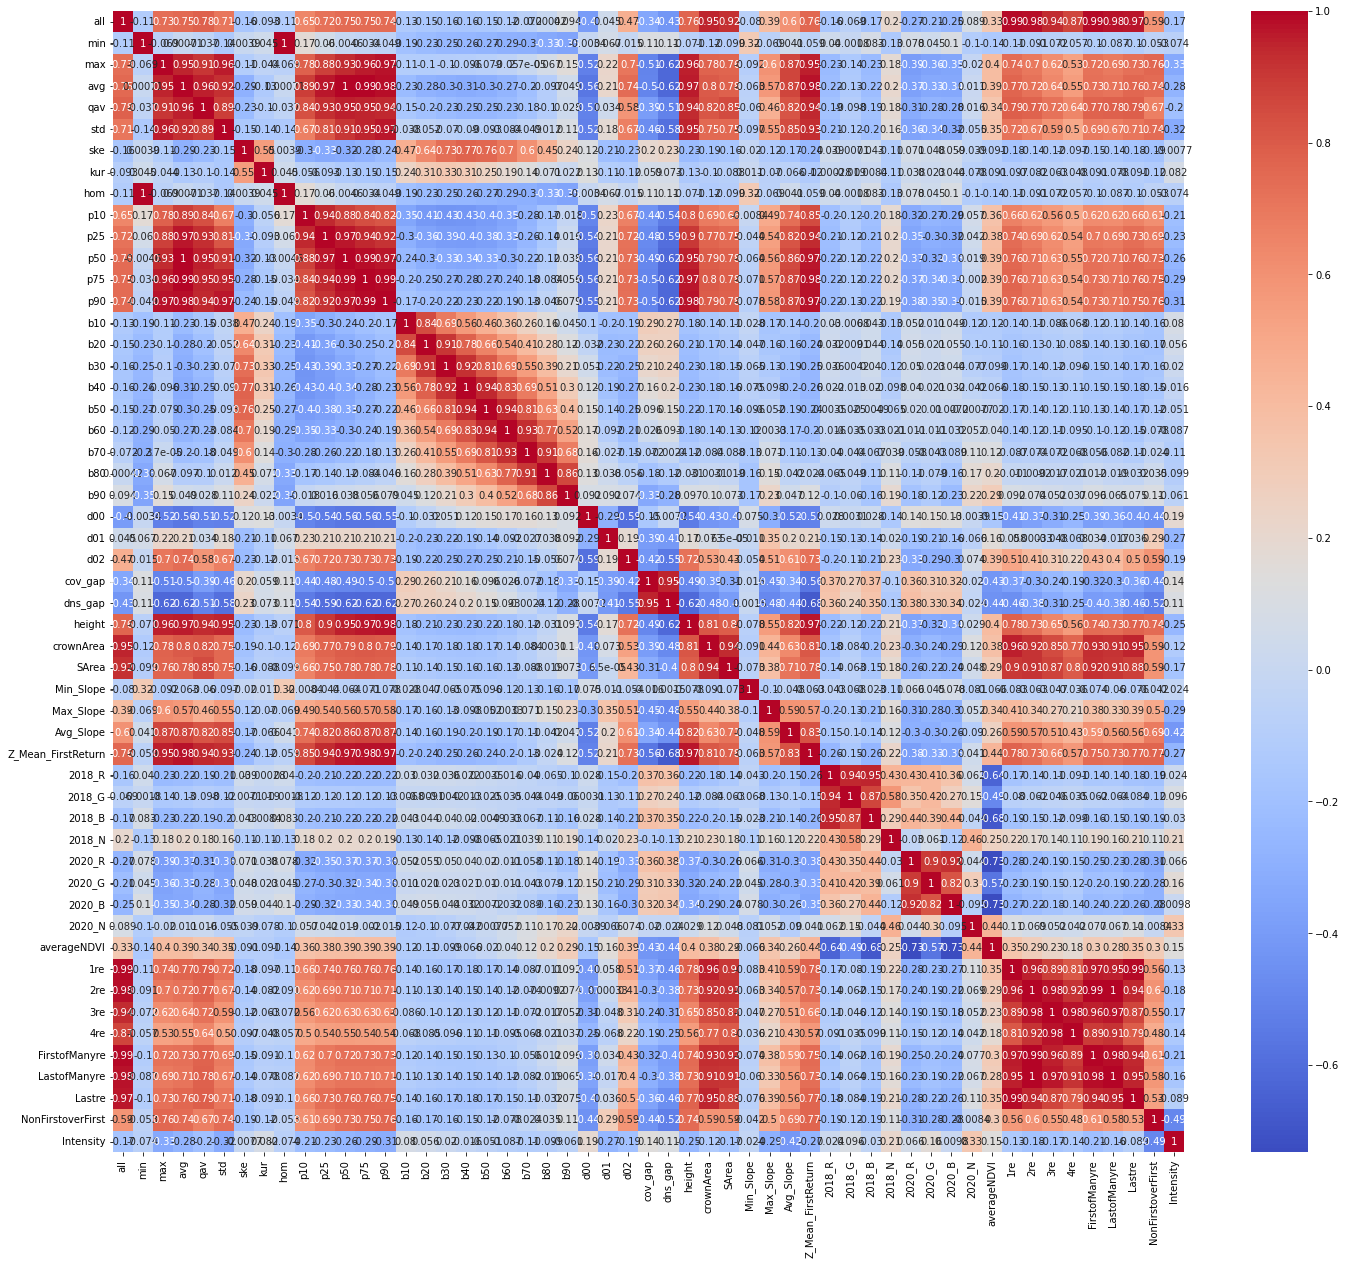

In [41]:
corr_matrix_west = dfWestMerge.iloc[:,6:].corr()
corr_matrix_east = dfEastMerge.iloc[:,6:].corr()
# correlations between columnes on the west
fig, ax = plt.subplots(figsize=(24,21))
sns.heatmap(corr_matrix_west, annot=True, cmap='coolwarm', ax=ax)
plt.show()

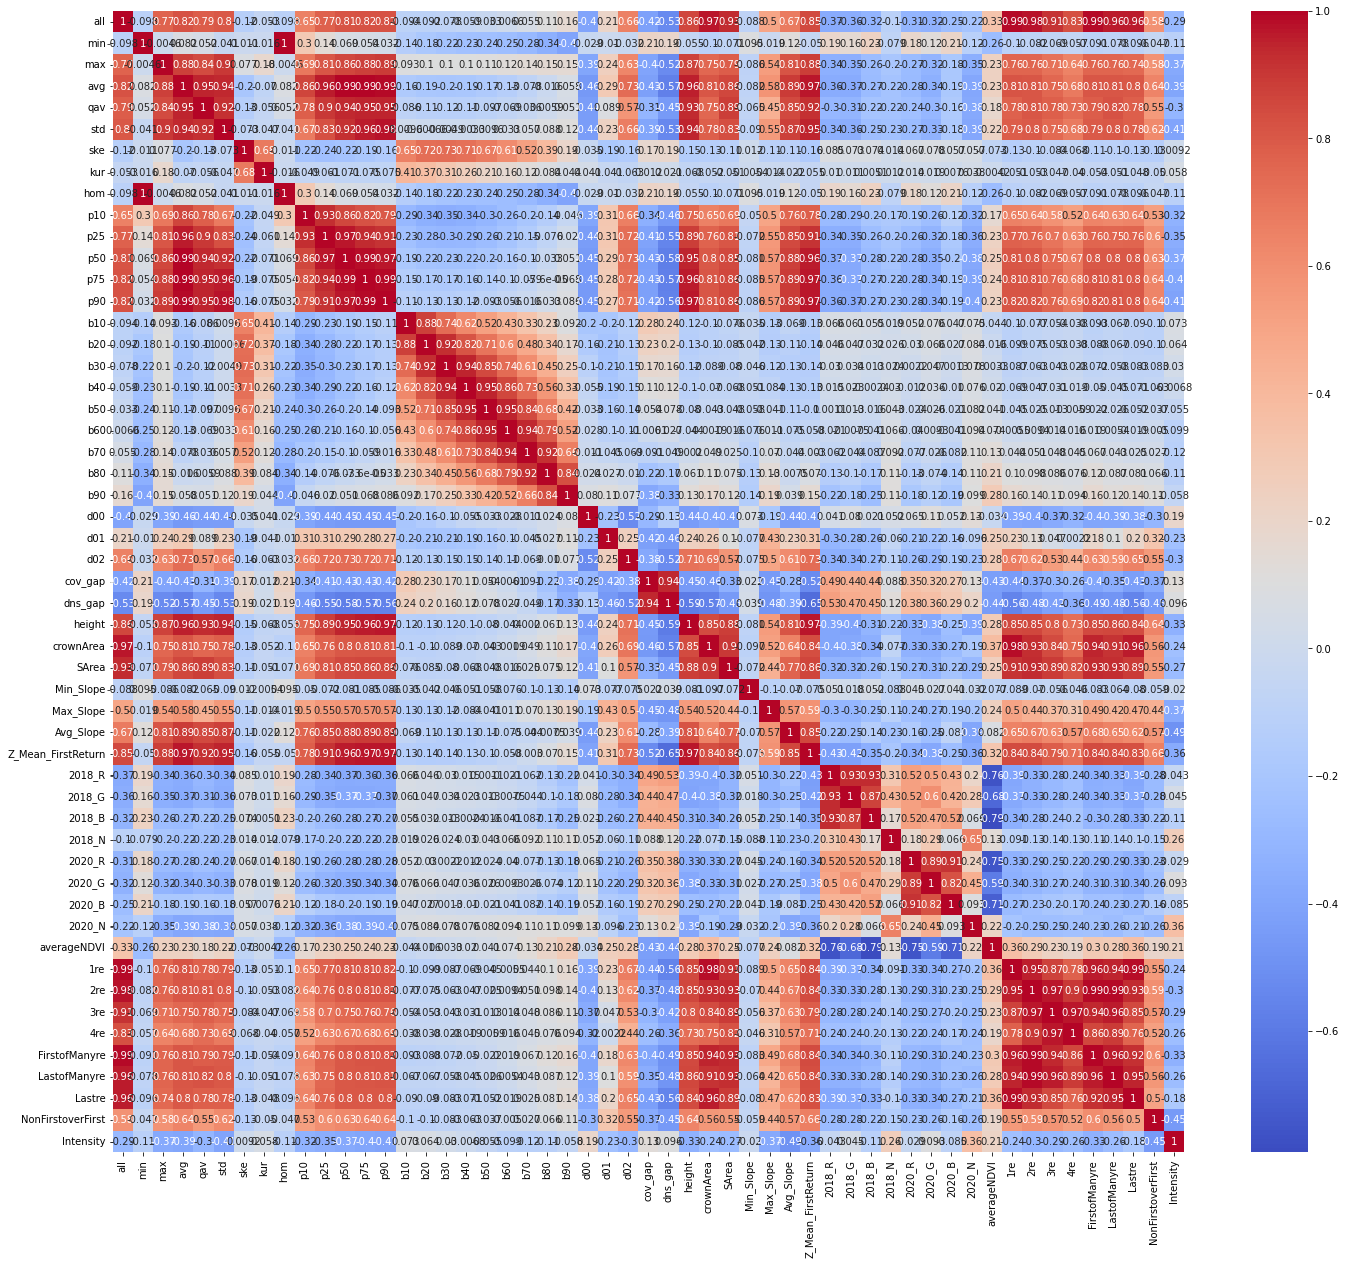

In [42]:
# correlations between columnes on the east
fig, ax = plt.subplots(figsize=(24,21))
sns.heatmap(corr_matrix_east, annot=True, cmap='coolwarm', ax=ax)
plt.show()

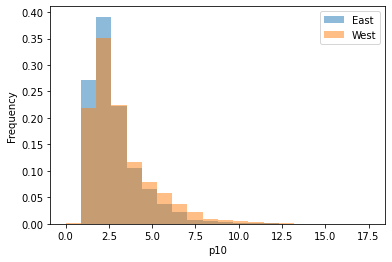

In [43]:
column_name = 'p10'
max_value = max(dfWestMerge[column_name].max(), dfEastMerge[column_name].max())

# plot histograms of a column from each DataFrame on the same plot
plt.hist(dfEastMerge[column_name], alpha=0.5, label='East', bins=20, range=(0,max_value),density=True)
plt.hist(dfWestMerge[column_name], alpha=0.5, label='West', bins=20, range=(0,max_value),density=True)
plt.xlabel('p10')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

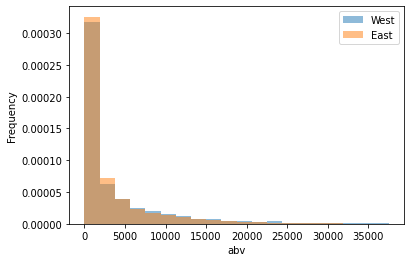

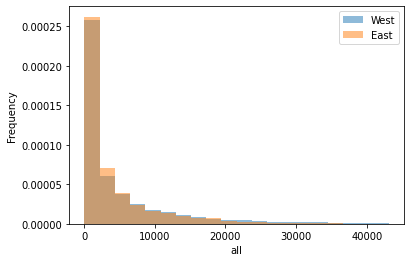

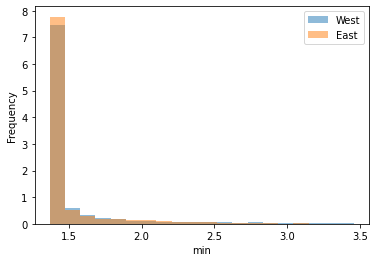

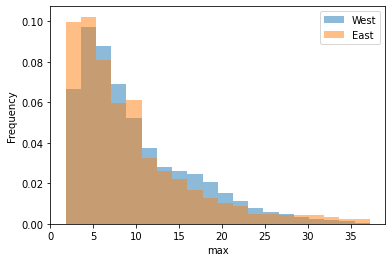

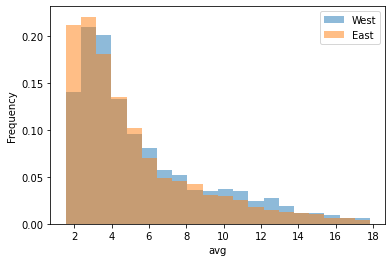

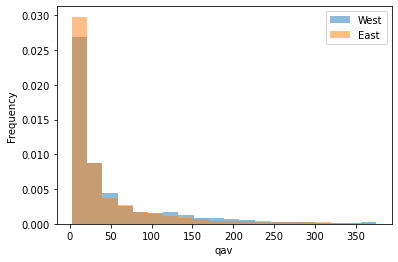

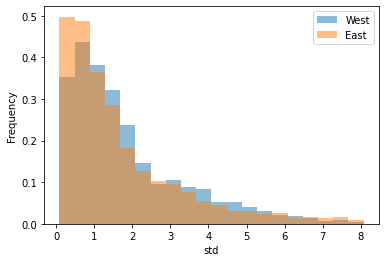

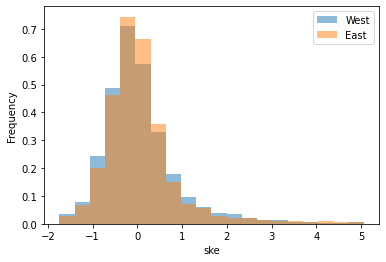

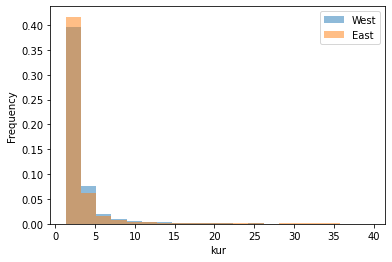

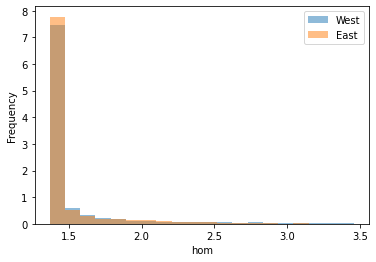

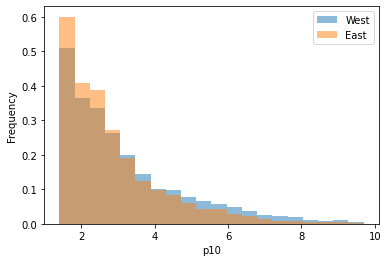

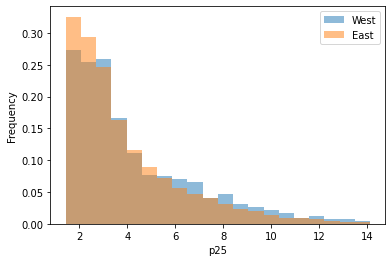

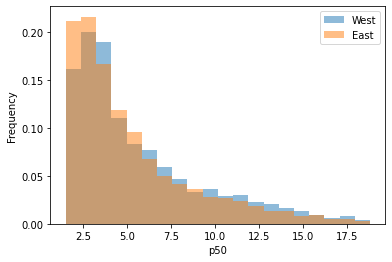

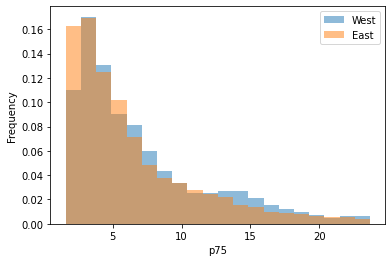

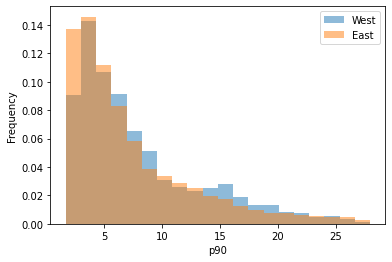

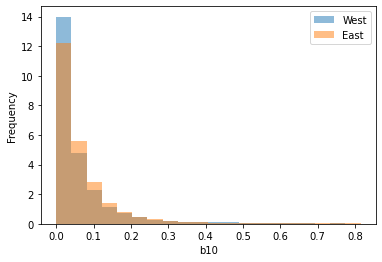

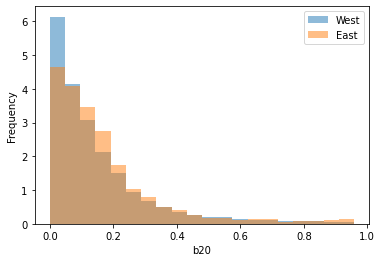

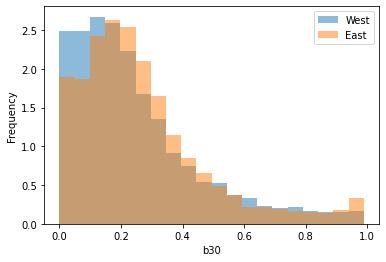

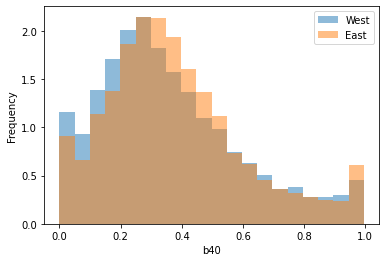

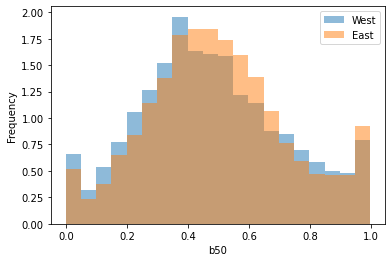

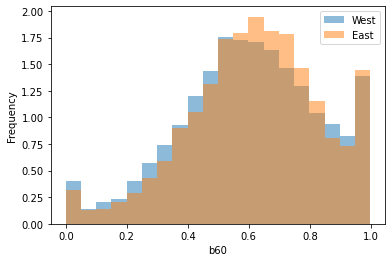

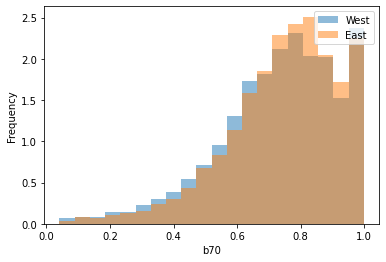

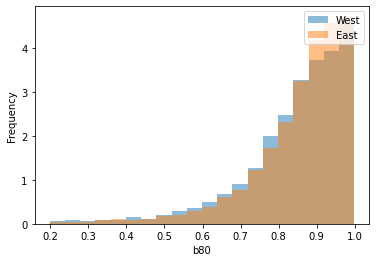

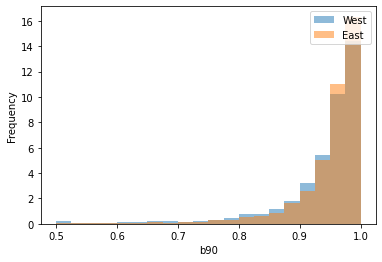

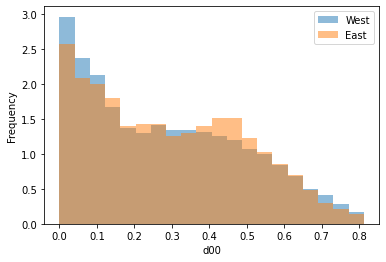

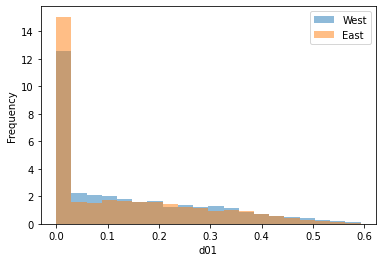

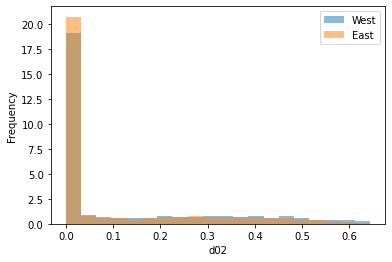

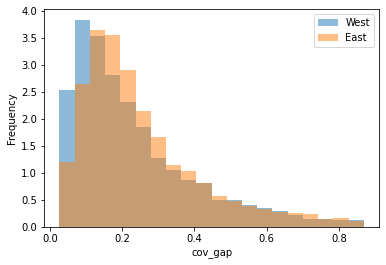

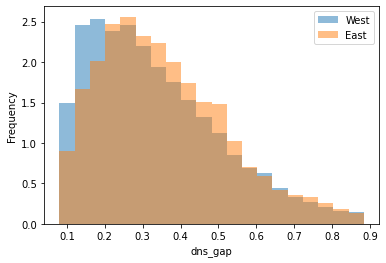

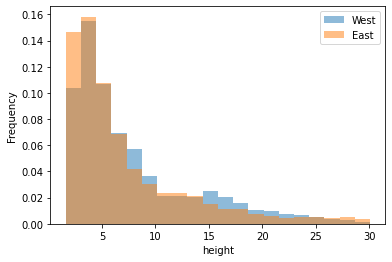

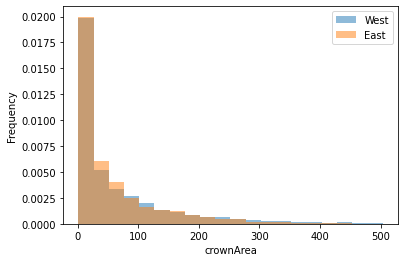

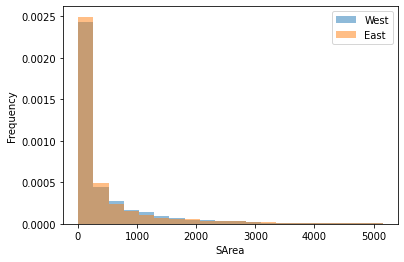

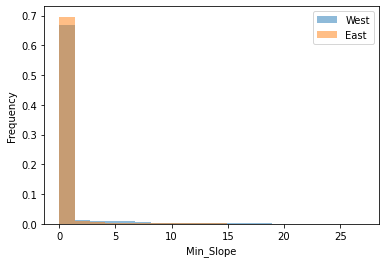

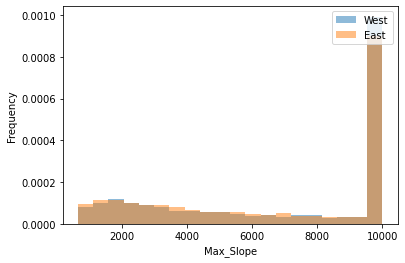

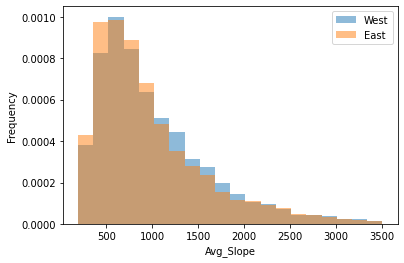

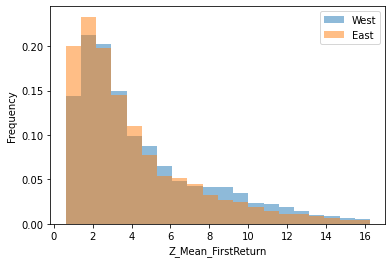

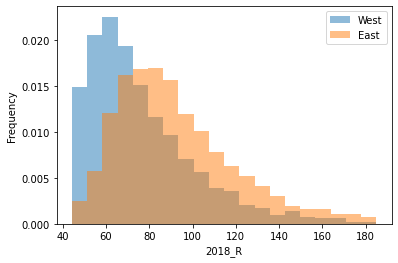

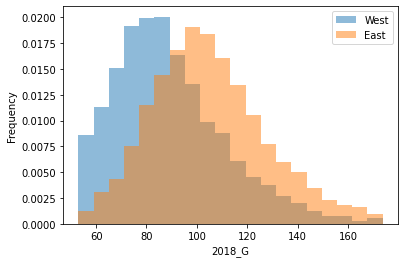

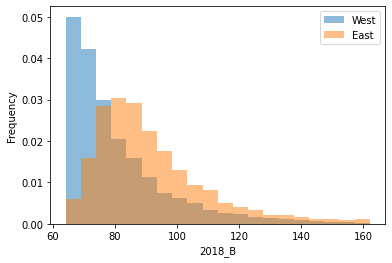

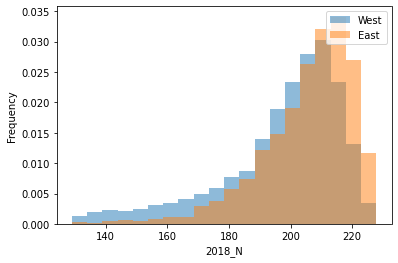

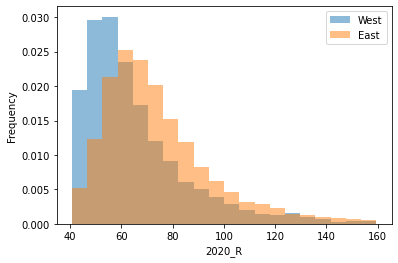

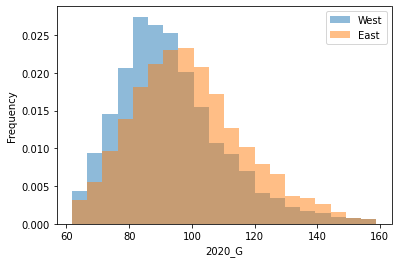

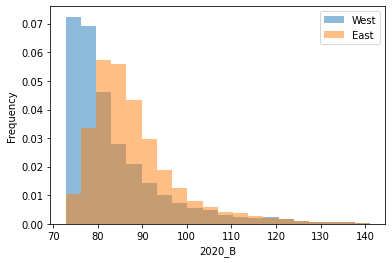

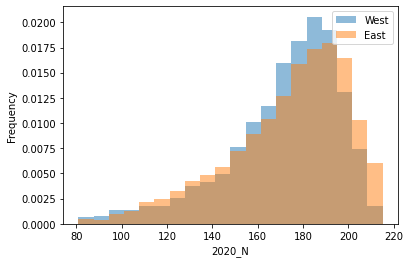

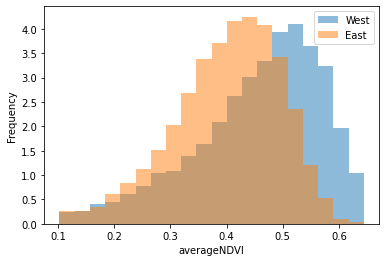

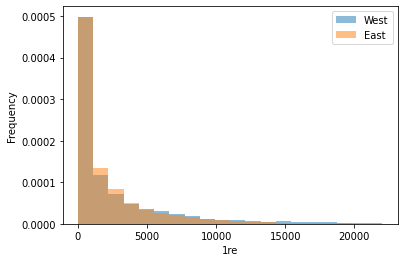

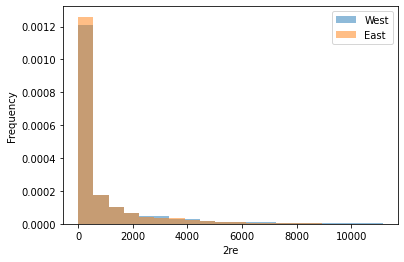

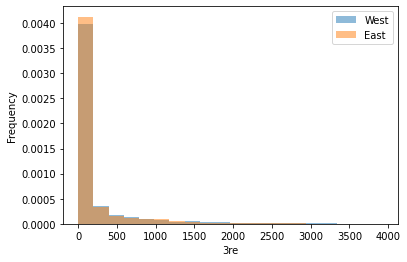

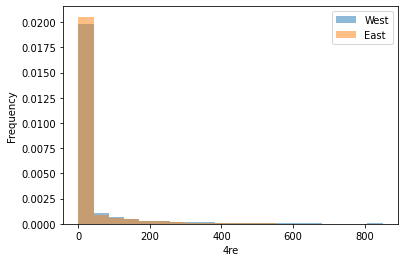

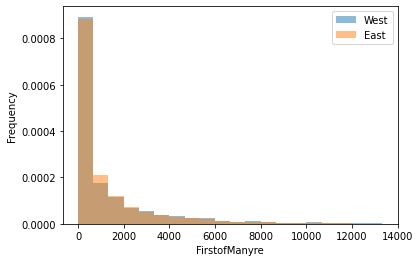

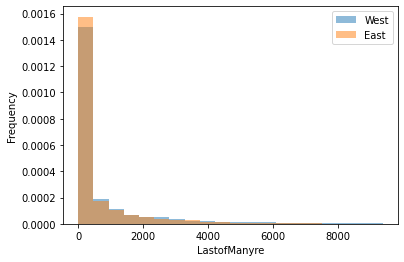

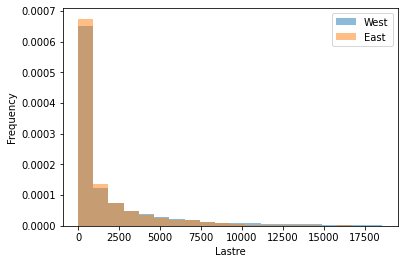

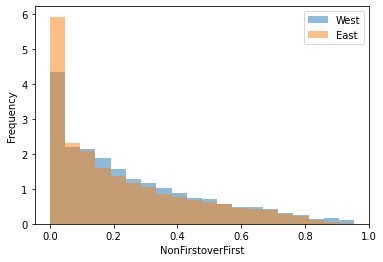

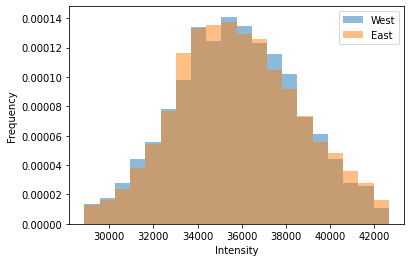

In [44]:
# Get a list of column names from the DataFrame
column_names = dfEastMerge.columns[5:]

# Set the range for the histograms
max_value = dfEastMerge.max().max()

top_percentile = 99
bottom_percentile = 1

# Loop through each column and plot its histogram
for column_name in column_names:
    # Get the bottom and top percentiles, excluding NaNs
    percentiles = np.nanpercentile(dfEastMerge[column_name], [bottom_percentile, top_percentile])
    bottom_percentile_val, top_percentile_val = percentiles[0], percentiles[1] \
        if not np.isnan(percentiles[1]) else dfEastMerge[column_name].max()

    # Repeat for the West DataFrame
    percentiles = np.nanpercentile(dfWestMerge[column_name], [bottom_percentile, top_percentile])
    bottom_percentile_val = max(bottom_percentile_val, percentiles[0]) \
        if not np.isnan(percentiles[0]) else bottom_percentile_val
    top_percentile_val = max(top_percentile_val, percentiles[1]) \
        if not np.isnan(percentiles[1]) else dfWestMerge[column_name].max()

    # plot histograms of a column from each DataFrame on the same plot
    plt.hist(dfWestMerge[column_name], alpha=0.5, label='West', bins=20, range=(bottom_percentile_val, top_percentile_val), density=True)
    plt.hist(dfEastMerge[column_name], alpha=0.5, label='East', bins=20, range=(bottom_percentile_val, top_percentile_val), density=True)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

# # Loop through each column and plot its histogram
# for column_name in column_names:
#     percentile99 = np.nanpercentile(dfEast[column_name], 98) \
#     if not np.isnan(np.nanpercentile(dfEast[column_name], 98)) \
#     else dfEast[column_name].max()
#     # Repeat for the West DataFrame
#     percentile99 = max(percentile99, \
#         np.nanpercentile(dfWest[column_name], 98) \
#         if not np.isnan(np.nanpercentile(dfWest[column_name], 98)) \
#         else dfWest[column_name].max())
#     # plot histograms of a column from each DataFrame on the same plot
#     plt.hist(dfEast[column_name], alpha=0.5, label='East', bins=10, range=(0,percentile99),density=True)
#     plt.hist(dfWest[column_name], alpha=0.5, label='West', bins=10, range=(0,percentile99),density=True)
#     plt.xlabel(column_name)
#     plt.ylabel('Frequency')
#     plt.legend(loc='upper right')
#     plt.show()

In [45]:
dfEastMerge = dfEastMerge[dfEastMerge['all'] != 0]
dfWestMerge = dfWestMerge[dfWestMerge['all'] != 0]
df = pd.concat([dfWestMerge, dfEastMerge])
df

treeID     min_x      min_y     max_x      max_y    abv    all  min  \
2      10003 527030.45 5043911.64 527034.10 5043912.86     46    100 2.68   
3      10004 527245.03 5043901.88 527259.66 5043916.21   8679  11003 1.37   
4      10005 527344.70 5043902.50 527362.07 5043917.74   8936  10874 1.44   
5      10006 527421.81 5043897.01 527442.54 5043917.74  12173  13477 1.38   
6      10007 527151.76 5043901.58 527167.30 5043914.69   4660   5729 1.38   
...      ...       ...        ...       ...        ...    ...    ...  ...   
7594   27621 538367.08 5039095.60 538371.66 5039103.22    513    917 1.42   
7595   27623 538339.96 5039094.69 538346.36 5039100.17    308    862 1.48   
7596   27625 538308.26 5039093.77 538311.61 5039097.12    137    389 2.09   
7597   27627 538247.30 5039092.86 538252.48 5039096.21    322    654 1.47   
7598   27628 538277.47 5039093.16 538284.79 5039097.12    538   1068 1.37   

       max   avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  \
2     2.91  2.87   8.23 0.04 -2.96 12.22 2.68 2.85  2.86  2.88  2.89  2.90   
3    14.93  7.99  72.76 2.98 -0.23  2.19 1.37 3.69  5.82  8.25 10.30 11.78   
4    16.93  8.16  78.78 3.48  0.25  2.26 1.44 3.47  5.50  8.00 10.26 13.43   
5    20.67 14.60 230.76 4.20 -0.84  2.66 1.38 8.02 11.57 15.86 17.97 18.96   
6    11.57  7.80  64.71 1.97 -0.93  3.61 1.38 5.22  6.57  8.28  9.28  9.92   
...    ...   ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...   
7594 22.70  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50   
7595 21.27  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50   
7596 20.93  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60   
7597 19.59  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53   
7598 22.48 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07   

      b10  b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  \
2    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52   
3    0.04 0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17   
4    0.05 0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15   
5    0.01 0.02 0.07 0.15 0.24 0.30 0.40 0.60 0.87 0.01 0.07 0.28     0.02   
6    0.02 0.04 0.06 0.11 0.24 0.38 0.55 0.81 0.98 0.06 0.29 0.45     0.15   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
7594 0.31 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15     0.40   
7595 0.10 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57   
7596 0.20 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61   
7597 0.38 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41   
7598 0.28 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47   

      dns_gap  height  crownArea   SArea  Min_Slope  Max_Slope  Avg_Slope  \
2        0.54    2.41       2.60   15.54       0.45    5698.07     875.34   
3        0.21   11.35     139.17 1273.63       0.00   10000.00    1671.15   
4        0.18   14.41     168.25 1121.49       0.00   10000.00    1244.77   
5        0.10   19.27     297.94 1331.66       0.14   10000.00    1511.67   
6        0.19    9.69      97.46  700.19       0.00   10000.00    1402.57   
...       ...     ...        ...     ...        ...        ...        ...   
7594     0.44    7.66      13.56  246.34       0.07   10000.00    3906.60   
7595     0.64    5.93      16.17  277.07       0.12   10000.00    3781.20   
7596     0.65    4.13       6.22   91.12       0.20    8227.38    2632.09   
7597     0.51    6.09       9.94  190.38       0.00    6532.73    3023.02   
7598     0.50    7.77      15.14  334.22       0.00   10000.00    3937.76   

      Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
2                   1.36   55.82   88.93   61.68  221.14  111.17  122.33   
3                   6.61   61.62   79.08   64.92  202.11   56.24   89.45   
4                   7.16   46.58   53.65   59.16  175.47   45.34  

In [46]:
df.describe()

treeID     min_x      min_y     max_x      max_y       abv       all  \
count 12912.00  12912.00   12912.00  12912.00   12912.00  12912.00  12912.00   
mean  19136.39 533836.83 5041378.63 533845.34 5041387.00   3657.02   4590.44   
std    5788.04   5751.18    1763.03   5750.71    1763.57   6884.78   7896.70   
min   10003.00 526651.89 5039092.86 526655.24 5039096.21      0.00      8.00   
25%   13289.75 527211.19 5039784.45 527222.47 5039792.98    242.75    449.00   
50%   21022.50 538370.89 5040518.86 538378.51 5040525.42   1021.00   1564.00   
75%   24300.25 538837.08 5043301.20 538845.92 5043308.44   4152.00   5458.50   
max   27628.00 539311.05 5043911.64 539318.36 5043917.74 207008.00 227700.00   

           min      max      avg      qav      std      ske      kur      hom  \
count 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00   
mean      1.52     9.56     5.40    48.68     1.78     0.09     4.08     1.52   
std       0.49     7.44     3.70    74.54     1.66     1.14    13.62     0.49   
min       0.00     0.00     0.00     0.00     0.00    -6.86     0.00     0.00   
25%       1.37     4.37     2.81     8.47     0.62    -0.43     2.06     1.37   
50%       1.38     7.31     4.10    18.50     1.24    -0.07     2.41     1.38   
75%       1.44    12.32     6.89    52.82     2.38     0.34     3.10     1.44   
max      12.48    80.25    25.63   690.28    12.82    22.31   656.83    12.48   

           p10      p25      p50      p75      p90      b10      b20      b30  \
count 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00   
mean      2.99     4.09     5.46     6.73     7.65     0.07     0.16     0.26   
std       1.65     2.63     3.87     4.99     5.75     0.12     0.18     0.22   
min       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
25%       1.83     2.25     2.76     3.21     3.57     0.01     0.05     0.12   
50%       2.50     3.19     4.09     5.01     5.70     0.04     0.11     0.21   
75%       3.56     5.16     6.99     8.64     9.85     0.09     0.21     0.35   
max      17.59    22.20    27.19    32.08    35.62     1.00     1.00     1.00   

           b40      b50      b60      b70      b80      b90      d00      d01  \
count 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00 12912.00   
mean      0.38     0.49     0.61     0.73     0.84     0.94     0.29     0.13   
std       0.23     0.24     0.22     0.20     0.16     0.11     0.21     0.15   
min       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
25%       0.21     0.33     0.47     0.63     0.79     0.93     0.11     0.00   
50%       0.34     0.47     0.62     0.76     0.88     0.97     0.27     0.08   
75%       0.50     0.64     0.77     0.87     0.94     0.98     0.46     0.23   
max       1.00     1.00     1.00     1.00     1.00     1.00     1.00     0.90   

           d02  cov_gap  dns_gap   height  crownArea    SArea  Min_Slope  \
count 12912.00 12912.00 12912.00 12912.00   12912.00 12912.00   12912.00   
mean      0.11     0.25     0.35     7.55      63.29   500.25       1.20   
std       0.18     0.18     0.18     6.22      93.98   994.17       7.62   
min       0.00     0.00     0.00     1.05       0.19    -1.00       0.00   
25%       0.00     0.12     0.21     3.38       8.27    28.52       0.00   
50%       0.00     0.19     0.32     5.19      26.01   114.27       0.10   
75%       0.20     0.32     0.46     9.43      81.29   508.52       0.22   
max       0.90     1.00     1.00    39.67    2189.63 22076.06     304.60   

       Max_Slope  Avg_Slope  Z_Mean_FirstReturn   2018_R   2018_G   2018_B  \
count   12912.00   12912.00            12912.00 12912.00 12912.00 12912.00   
mean     6609.02     998.74                4.28    83.72    96.47    84.34   
std      3489.51     655.27                3.41    30.31    26.96    21.05   
min         0.68       0.21               -0.00    21.00    29.00    44.96   
25%      3076.53     5

In [47]:
zero_rows = df[df['all'] == 0]
id_list = zero_rows['treeID'].tolist()
print(id_list)

[]


In [48]:
dfEastMerge.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East009701_TreeMetrics_Clean.csv', index=False)

In [49]:
dfWestMerge.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West002401_TreeMetrics_Clean.csv', index=False)

In [50]:
df.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeMetrics_Clean.csv', index=False)

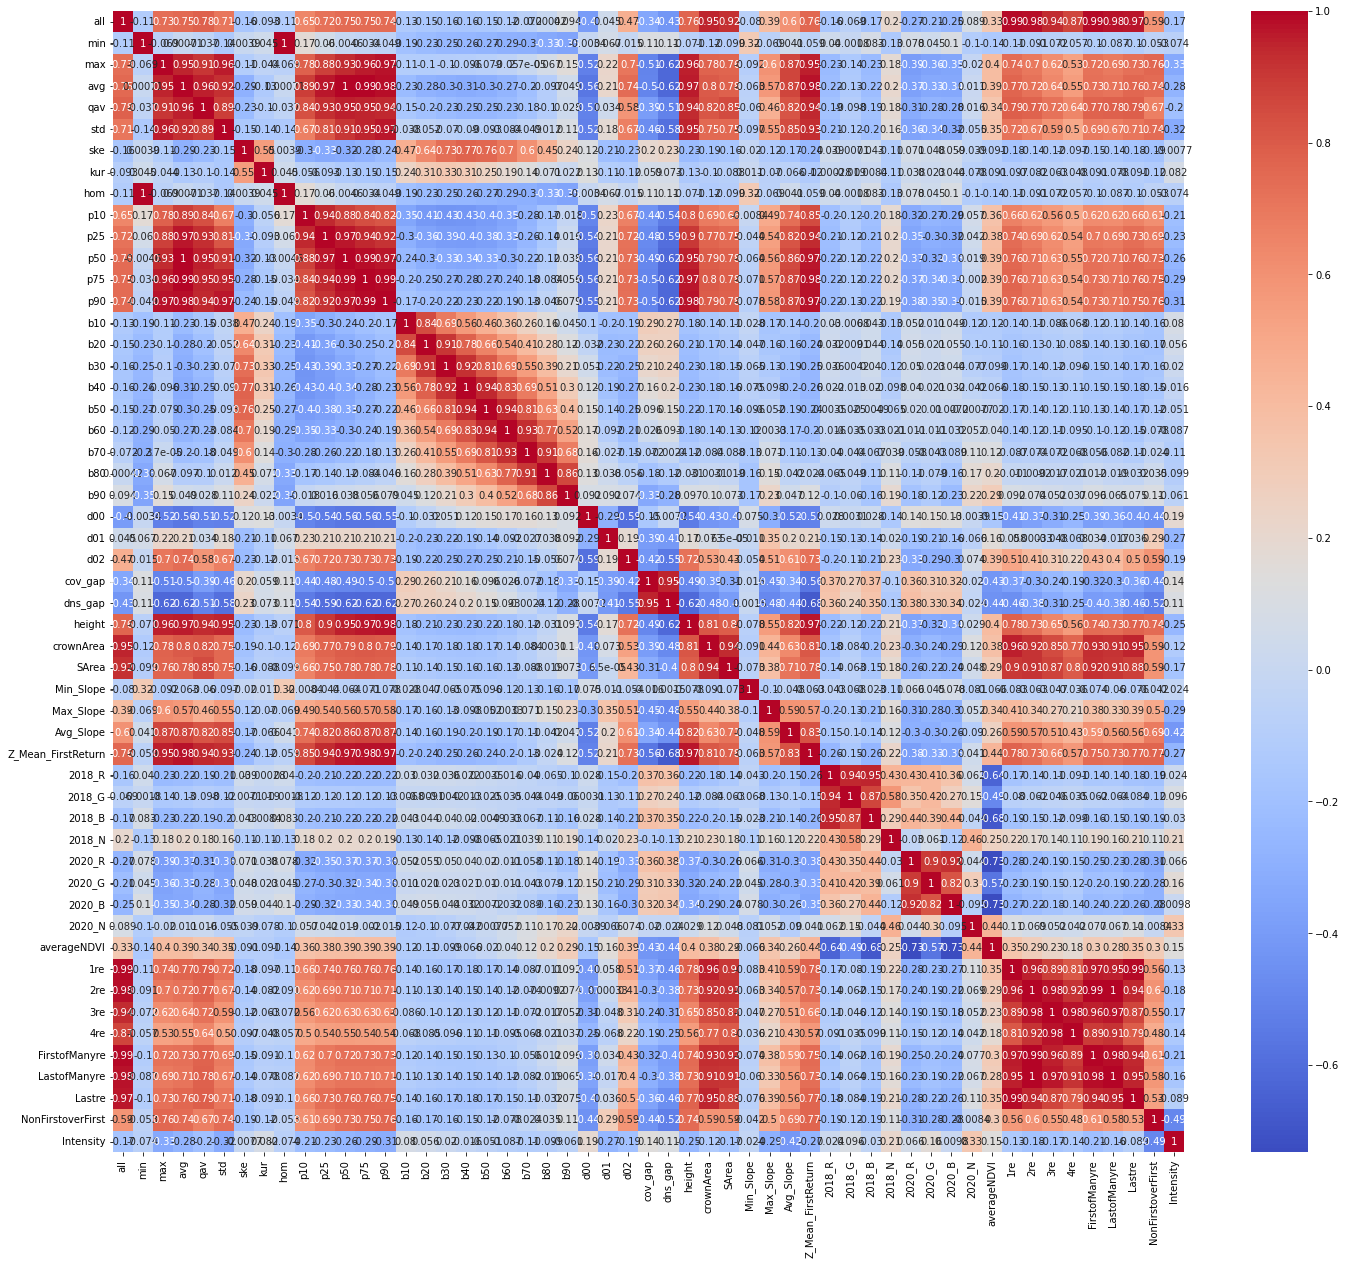

In [51]:
corr_matrix = df.iloc[:,6:].corr()
# correlations between columnes on the west
fig, ax = plt.subplots(figsize=(24,21))
sns.heatmap(corr_matrix_west, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [52]:
# # Replace NaN values with column median
# imputer = SimpleImputer(strategy='median')
# columns = df.iloc[:, 5:].values
# columns = imputer.fit_transform(columns)

# # Perform PCA
# pca = PCA()
# pca.fit(columns)

# # Determine number of components with eigenvalues > 1
# len([eigval for eigval in pca.explained_variance_ if eigval > 1])